# Taxi Trip

**Proyek Akhir KASDD - Kelompok KASDEAD**

## Anggota Kelompok

- Carissa Almira Yudiva (2106751676)
- Fathirahma Alyssa Pristanti (2206082215)
- Muhammad Haekal Kalipaksi (2206817490)

# Package Installation

In [1]:
# %pip install pandas
# %pip install numpy
# %pip install scikit-learn==1.5.2
# %pip install xgboost
# %pip install hyperopt
# %pip install catboost
# %pip install yellowbrick

# Global Import

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Load Train Datasets

In [3]:
url  = "https://drive.google.com/uc?id=1wnDUJCke0araT3A7SAk8ZLTIbV00R3ev"
raw_df = pd.read_csv(url)

# Data Description

## Jumlah Baris dan Kolom

In [4]:
print(f"Jumlah Baris: {raw_df.shape[0]}")
print(f"Jumlah Kolom: {raw_df.shape[1]}")

Jumlah Baris: 8000
Jumlah Kolom: 21


## Data Info

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8000 non-null   object 
 1   VendorID               8000 non-null   float64
 2   lpep_pickup_datetime   8000 non-null   object 
 3   lpep_dropoff_datetime  8000 non-null   object 
 4   store_and_fwd_flag     8000 non-null   object 
 5   RatecodeID             8000 non-null   float64
 6   PULocationID           8000 non-null   int64  
 7   DOLocationID           8000 non-null   int64  
 8   passenger_count        8000 non-null   float64
 9   trip_distance          8000 non-null   float64
 10  fare_amount            8000 non-null   float64
 11  extra                  8000 non-null   float64
 12  mta_tax                8000 non-null   float64
 13  tip_amount             8000 non-null   float64
 14  tolls_amount           8000 non-null   float64
 15  ehai

## Data Columns

In [6]:
raw_df.columns

Index(['ID', 'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'trip_type', 'congestion_surcharge', 'payment_type'],
      dtype='object')

Berikut ini adalah deskripsi kolom pada dataset:
- **VendorID**: Kode yang menunjukkan penyedia TPEP yang menyediakan catatan.
  - *1 = Creative Mobile Technologies, LLC*
  - *2 = VeriFone Inc*
- **lpep_pickup_datetime**: Tanggal dan waktu ketika meteran dinyalakan.
- **lpep_dropoff_datetime**: Tanggal dan waktu ketika meteran dimatikan.
- **store_and_fwd_flag**: Flag yang menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor.
  - *Y = perjalanan yang disimpan dan diteruskan*
  - *N = perjalanan yang tidak disimpan dan diteruskan*
- **RatecodeID**: Kode tarif akhir yang berlaku pada akhir perjalanan.
  - *1 = Tarif standar*
  - *2 = JFK*
  - *3 = Newark*
  - *4 = Nassau atau Westchester*
  - *5 = Tarif negosiasi*
  - *6 = Perjalanan grup*
- **PULocationID**: Zona Taksi TLC di mana meteran dinyalakan.
- **DOLocationID**: Zona Taksi TLC di mana meteran dimatikan.
- **passenger_count**: Jumlah penumpang di kendaraan. Ini adalah nilai yang dimasukkan oleh sopir.
- **trip_distance**: Jarak perjalanan yang telah dilalui dalam mil yang dilaporkan oleh meteran.
- **fare_amount**: Biaya waktu dan jarak yang dihitung oleh meteran.
- **extra**: Biaya tambahan dan surcharge (misalnya, biaya tambahan $0,50 dan $1 untuk jam sibuk dan malam hari).
- **mta_tax**: Pajak MTA sebesar 0,50 dolar yang otomatis dikenakan berdasarkan tarif meteran yang digunakan.
- **tip_amount**: Jumlah tip field ini otomatis terisi untuk tip kartu kredit. Tip tunai tidak termasuk.
- **tolls_amount**: Jumlah total semua tol yang dibayar selama perjalanan.
- **improvement_surcharge**: Biaya perbaikan sebesar $0,30 yang dikenakan pada awal perjalanan. Biaya ini mulai diterapkan pada tahun 2015.
- **total_amount**: Jumlah total yang dibebankan kepada penumpang (tidak termasuk tip tunai).
- **payment_type**: Kode numerik yang menunjukkan bagaimana penumpang membayar perjalanan.
  - *1 = Kartu kredit*
  - *2 = Tunai*
- **trip_type**: Jenis perjalanan.
  - *1 = Inner city*
  - *2 = Outer city*
- **congestion_surcharge**: Jumlah total yang dikumpulkan untuk surcharge kemacetan NYC selama perjalanan.

## Data Overview

In [7]:
raw_df.head()

,ID,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type
0,T03315,2.0,2021-07-02 17:19:11,2021-07-02 17:40:02,N,1.0,152,142,1.0,4.30,...,1.0,0.5,5.00,0.00,NaN,0.3,27.55,1.0,2.75,1.0
1,T07720,2.0,2021-07-05 22:48:04,2021-07-05 23:12:02,N,1.0,93,107,2.0,13.52,...,0.5,0.5,12.15,6.55,NaN,0.3,60.75,1.0,2.75,1.0
2,T09695,2.0,2021-07-07 06:29:43,2021-07-07 06:38:42,N,1.0,74,75,1.0,1.55,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
3,T08802,2.0,2021-07-06 15:33:29,2021-07-06 15:43:25,N,1.0,226,129,1.0,1.22,...,0.0,0.5,0.00,0.00,NaN,0.3,8.80,1.0,0.00,2.0
4,T01413,2.0,2021-07-01 17:09:07,2021-07-01 18:03:12,N,1.0,55,86,1.0,14.23,...,1.0,0.5,0.00,2.45,NaN,0.3,49.75,1.0,0.00,1.0


# Data Cleaning

## Duplicate Values

Sebelum melakukan proses training, kami ingin mengetahui apakah terdapat baris yang duplikat. Berikut adalah kode yang digunakan untuk menghitung jumlah duplikat.

In [8]:
duplicated_raws = raw_df.duplicated()
num_duplicates = duplicated_raws.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


Dari hasil run kode diatas, dapat dilihat bahwa tidak terdapat data yang duplikat. Oleh karena itu, kami tidak perlu melakukan penanganan data yang duplikat.

## Missing Values

Selanjutnya kami perlu memeriksa apakah terdapat kolom yang mengandung nilai null/NaN. Untuk menentukan apakah suatu kolom perlu dihapus, kami akan meninjau persentase nilai yang hilang (missing values) pada kolom tersebut. Jika persentasenya melebihi 50%, kolom tersebut akan kita hapus. Jika tidak, kita akan melakukan imputasi data. Berikut adalah kode untuk menampilkan persentase missing values

In [9]:
MISSING_THRESHOLD = raw_df.shape[0] * 0.5

missing_counts = raw_df.isna().sum().sort_values(ascending=False)
present_counts = raw_df.notna().sum()
missing_percentage = (missing_counts / raw_df.shape[0] * 100).round(2)

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Present Values': present_counts,
    'Missing Percent': missing_percentage
})

missing_data_summary[missing_data_summary['Missing Values'] > MISSING_THRESHOLD]

,Missing Values,Present Values,Missing Percent
ehail_fee,8000,0,100.0


Setelah melakukan pengecekan, kami menemukan bahwa kolom `ehail_fee` memiliki missing values sebanyak 8000 baris (100%). Oleh karena itu, kami akan menghapus kolom tersebut dari data training.

In [10]:
raw_df = raw_df.drop(columns=['ehail_fee'], axis=1)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8000 non-null   object 
 1   VendorID               8000 non-null   float64
 2   lpep_pickup_datetime   8000 non-null   object 
 3   lpep_dropoff_datetime  8000 non-null   object 
 4   store_and_fwd_flag     8000 non-null   object 
 5   RatecodeID             8000 non-null   float64
 6   PULocationID           8000 non-null   int64  
 7   DOLocationID           8000 non-null   int64  
 8   passenger_count        8000 non-null   float64
 9   trip_distance          8000 non-null   float64
 10  fare_amount            8000 non-null   float64
 11  extra                  8000 non-null   float64
 12  mta_tax                8000 non-null   float64
 13  tip_amount             8000 non-null   float64
 14  tolls_amount           8000 non-null   float64
 15  impr

Dari hasil eksekusi kode diatas, dapat dilihat bahwa untuk setiap kolom sudah tidak ada yang memiliki missing value.

# Data Exploration

## Faktor Yang Mempengaruhi Tarif Total Perjalanan

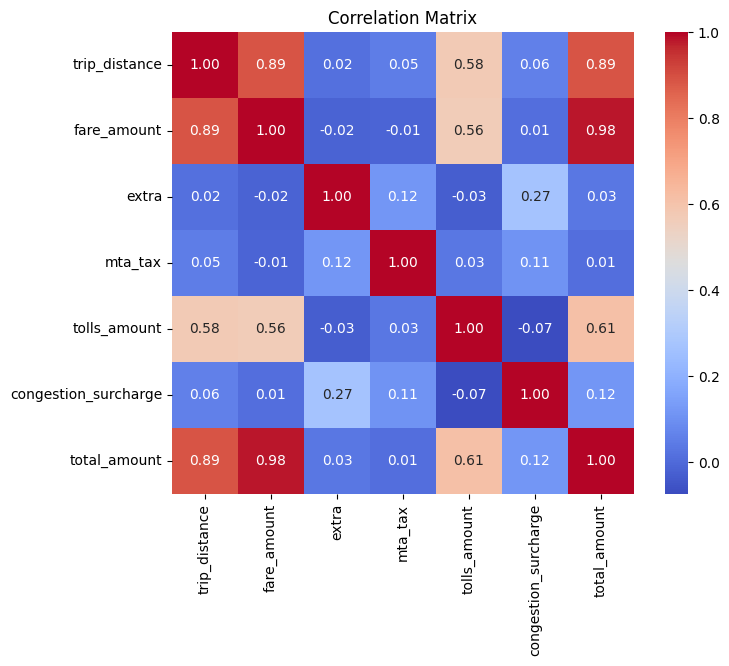

In [11]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore


continuous_columns = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'congestion_surcharge', 'total_amount']
correlation_matrix = raw_df[continuous_columns].corr()

# melihat korelasi terhadap 'total_amount' untuk melihat faktor yang paling berpengaruh
correlation_with_total = correlation_matrix['total_amount'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

### Pertanyaan 1: Faktor apa yang mempengaruhi tarif total perjalanan? (cukup pertimbangkan atribut kontinu saja

Berdasarkan heatmap yang dibuat dari korelasi pearson, variabel `total_amount` memiliki korelasi (hubungan linear) yang sangat tinggi dengan variabel **trip_distance dan fare_amount**. Hal ini menunjukkan bahwa tarif dasar perjalanan dan jarak tempuh perjalanan merupakan faktor yang mempengaruhi tarif total perjalanan.

#### Hubungan Antara Jumlah Penumpang dan Jarak Perjalanan

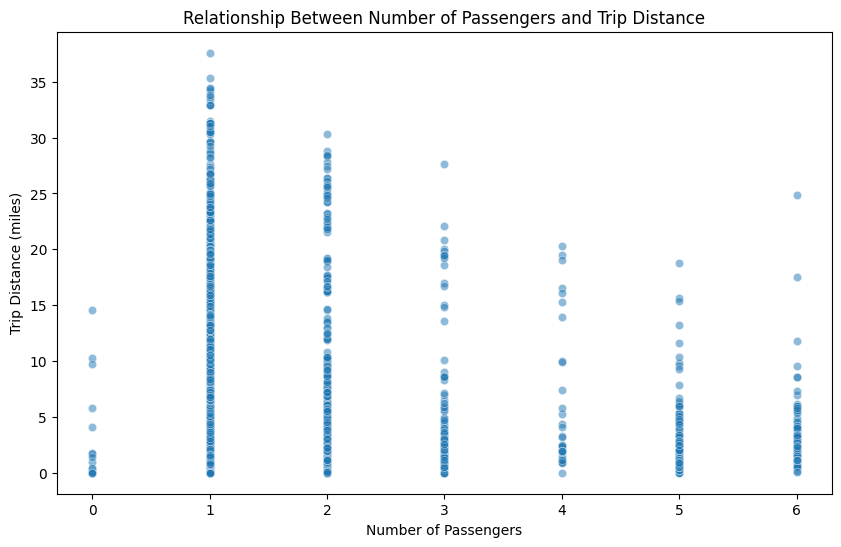

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='trip_distance', data=raw_df, alpha=0.5)
plt.title('Relationship Between Number of Passengers and Trip Distance')
plt.xlabel('Number of Passengers')
plt.ylabel('Trip Distance (miles)')
plt.show()

### Pertanyaan 2: Apakah terdapat hubungan antara jumlah penumpang dan jarak perjalanan

Berdasarkan grafik scatterplot di atas, dapat diketahui bahwa **tidak ada hubungan** yang signifikan antara jumlah penumpang dan jarak perjalana

## Waktu Tersibuk Perjalanan Taxi

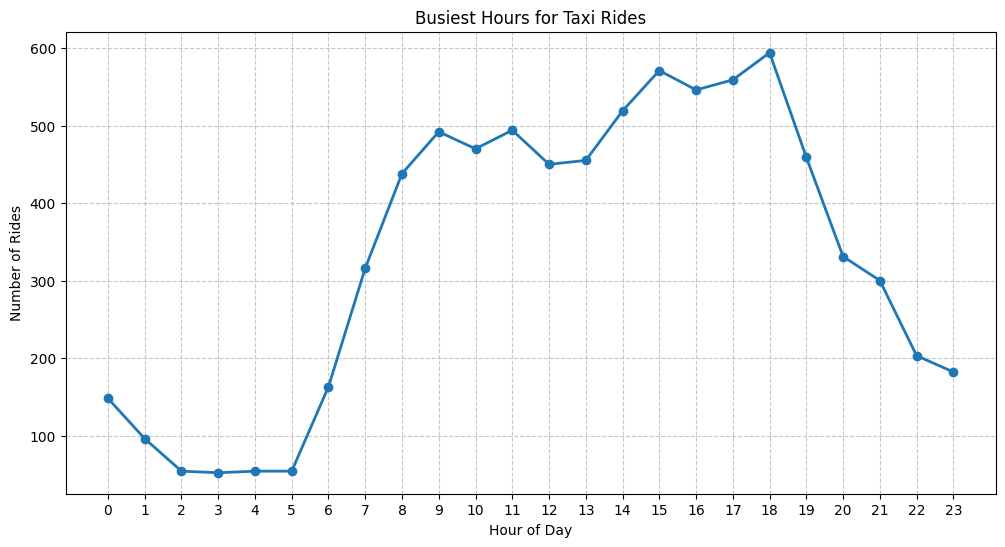

In [13]:
raw_df['lpep_pickup_datetime'] = pd.to_datetime(raw_df['lpep_pickup_datetime'], errors='coerce')

explore_df = raw_df.copy()
explore_df['hour_of_day'] = explore_df['lpep_pickup_datetime'].dt.hour
hourly_counts = explore_df['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linewidth=2)

plt.title('Busiest Hours for Taxi Rides')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 3: Kapan waktu tersibuk untuk perjalanan taksi

Berdasarkan grafik line chart di atas, dapat dilihat bahwa waktu tersibuk perjalanan taksi berada pada **pukul 18.00**, di mana mulai terjadi peningkatan jumlah perjalanan pada sore hari, mulai rentang waktu pukul 15.00 - 18.00. Hal ini dapat disebabkan karena pada rentang waktu tersebut merupakan **rush hour** yang bertepatan dengan jam pulang kerja

## Zona Pickup dengan Perjalanan Terbanyak

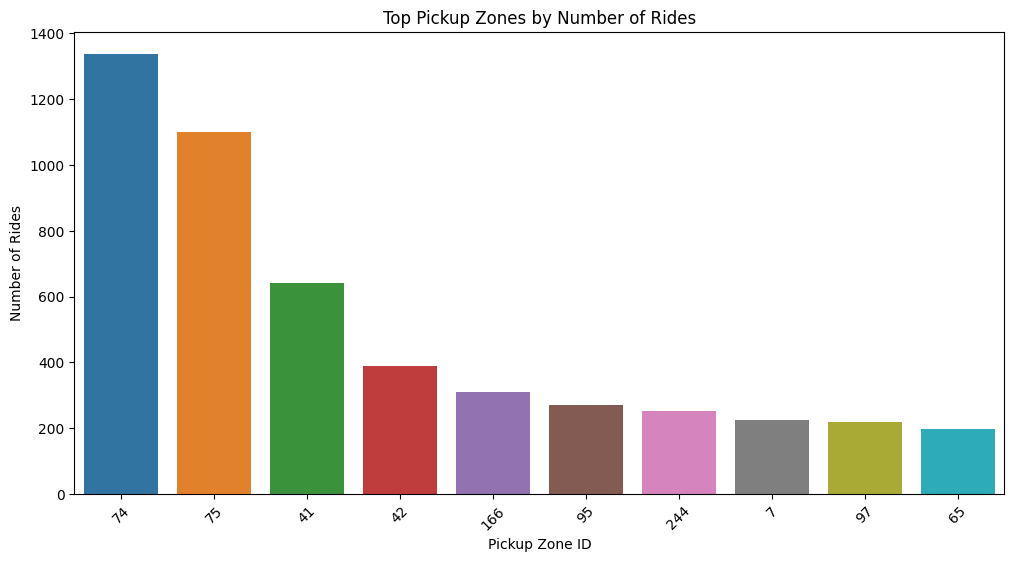

In [14]:
top_pickup_zones = raw_df['PULocationID'].value_counts().head(10)
top_pickup_zones = top_pickup_zones.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_zones.index,
            y=top_pickup_zones.values,
            order=top_pickup_zones.index)
plt.title('Top Pickup Zones by Number of Rides')
plt.xlabel('Pickup Zone ID')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 4: Zona pickup mana yang memiliki perjalanan terbanyak?

Berdasarkan grafik batang diatas, dapat dilihat bahwa **Zona dengan ID 74 memiliki jumlah perjalanan terbanyak**. Hal ini mengindikasikan bahwa zona tersebut merupakan pusat bisnis atau daerah ramai, seperti bandara atau termina

## Pengaruh Jarak Perjalanan pada Jumlah Tip (Eksplorasi Tambahan)

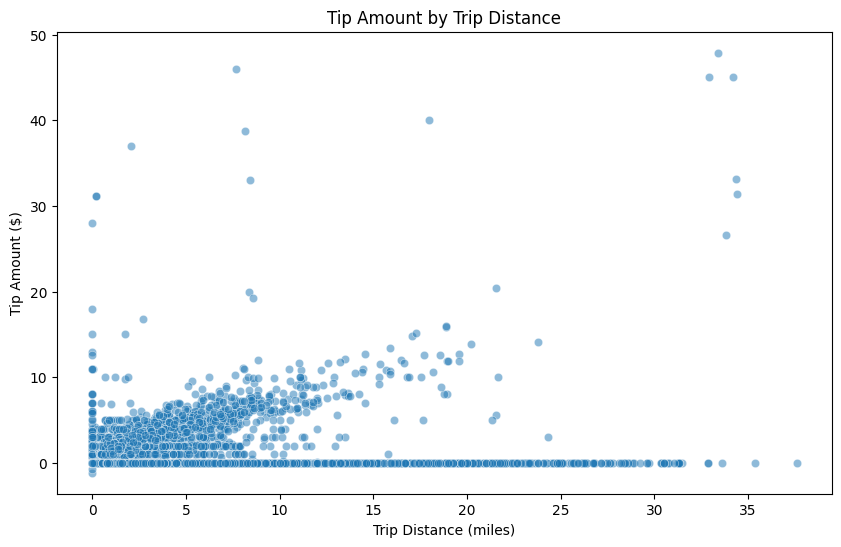

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=raw_df, x='trip_distance', y='tip_amount', alpha=0.5)
plt.title('Tip Amount by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

Scatter plot menunjukkan bahwa terdapat hubungan positif antara jarak perjalanan dan jumlah tip yang diberikan, di mana perjalanan dengan jarak yang lebih jauh cenderung mendapatkan tip yang lebih tinggi. Pada perjalanan pendek (0-5 mil), sebagian besar tip rendah atau tidak ada sama sekali, menunjukkan bahwa penumpang cenderung memberikan tip kecil atau tidak memberikan tip pada perjalanan singkat. Meskipun demikian, terdapat beberapa outlier dengan tip tinggi pada jarak perjalanan yang sangat jauh (lebih dari 25 mil), yang mungkin disebabkan oleh faktor lain seperti kualitas layanan. Secara keseluruhan, meskipun terdapat beberapa variasi, tip cenderung lebih tinggi pada perjalanan dengan jarak yang lebih jauh

## Jarak Perjalanan dan Waktu Hari pada Data Perjalanan Taksi (Eskplorasi Tambahan)

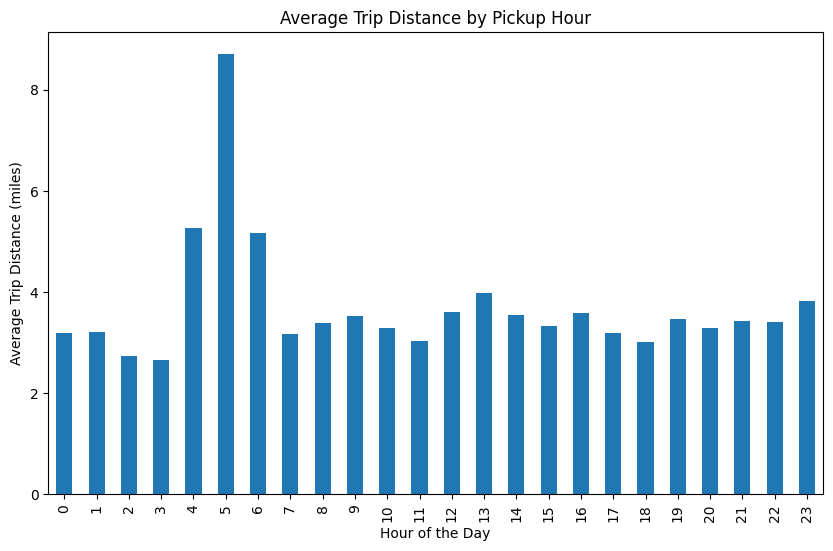

In [16]:
raw_df['lpep_pickup_datetime'] = pd.to_datetime(raw_df['lpep_pickup_datetime'])
explore_df = raw_df.copy()
explore_df['pickup_hour'] = explore_df['lpep_pickup_datetime'].dt.hour

avg_trip_distance_by_hour = explore_df.groupby('pickup_hour')['trip_distance'].mean()

plt.figure(figsize=(10, 6))
avg_trip_distance_by_hour.plot(kind='bar')
plt.title('Average Trip Distance by Pickup Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance (miles)')
plt.show()

Berdasarkan grafik di atas, jarak rata-rata perjalanan taksi menunjukkan puncak tertinggi pada pukul 5 pagi, dengan rata-rata jarak tempuh melebihi 8 mil. Hal ini mengindikasikan adanya perjalanan jarak jauh yang lebih umum dilakukan pada jam-jam awal pagi, kemungkinan untuk tujuan khusus seperti menuju bandara atau area di luar kota. Setelah pukul 5 pagi, jarak rata-rata kembali menurun dan stabil sepanjang hari, dengan sedikit peningkatan di beberapa jam, namun tetap berada di kisaran 2-5 mil.

# Clustering

Pada bagian ini, kami akan membangun model clustering. Kami menggunakan 3 fitur berikut:
- **extra**: Biaya tambahan dan surcharge (misalnya, biaya tambahan $0,50 dan $1 untuk jam sibuk dan malam hari).

- **trip_distance**: Jarak perjalanan yang telah dilalui dalam mil yang dilaporkan oleh meteran.

-  **peak_hour**: Menandai apakah perjalanan dilakukan pada jam sibuk atau tidak. Fitur ini didapatkan dari fitur `pickup_hour` yang merupakan hasil encoding fitur `lpep_pickup_hour`.

## Clone Data

In [17]:
df_clustering = raw_df.copy()

## Clustering Data Processing

### Drop `Payment_Type`

In [18]:
df_clustering = df_clustering[df_clustering['payment_type'].isin([1, 2])]

### Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
# Encoding store_and_fwd_flag
label_encoder = LabelEncoder()

df_clustering["store_and_fwd_flag"] = label_encoder.fit_transform(df_clustering["store_and_fwd_flag"])

In [20]:
# Convert datetime
df_clustering['pickup_datetime'] = pd.to_datetime(df_clustering['lpep_pickup_datetime'])
df_clustering['dropoff_datetime'] = pd.to_datetime(df_clustering['lpep_dropoff_datetime'])

In [21]:
# Extract time-based features
df_clustering['pickup_hour'] = df_clustering['pickup_datetime'].dt.hour
df_clustering['pickup_day'] = df_clustering['pickup_datetime'].dt.dayofweek
df_clustering['pickup_month'] = df_clustering['pickup_datetime'].dt.month
df_clustering['dropoff_hour'] = df_clustering['dropoff_datetime'].dt.hour
df_clustering['dropoff_day'] = df_clustering['dropoff_datetime'].dt.dayofweek
df_clustering['dropoff_month'] = df_clustering['dropoff_datetime'].dt.month

In [22]:
# Create trip_duration column
df_clustering['trip_duration'] = (df_clustering['dropoff_datetime'] - df_clustering['pickup_datetime']).dt.total_seconds() / 60

In [23]:
def encode_cyclical(df, feature, max_val):
    df_clustering[f'{feature}_sin'] = np.sin(2 * np.pi * df[feature] / max_val)
    df_clustering[f'{feature}_cos'] = np.cos(2 * np.pi * df[feature] / max_val)

In [24]:
# Cyclinical encoding hour and month
encode_cyclical(df_clustering, 'pickup_hour', 24)
encode_cyclical(df_clustering, 'dropoff_hour', 24)
encode_cyclical(df_clustering, 'pickup_month', 12)
encode_cyclical(df_clustering, 'dropoff_month', 12)

In [25]:
# Drop unnecessary columns
df_clustering = df_clustering.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pickup_datetime', 'dropoff_datetime'], axis=1)

In [26]:
df_clustering['speed'] = df_clustering['trip_distance'] / df_clustering['trip_duration'].replace(0, np.nan)
df_clustering['fare_per_mile'] = df_clustering['fare_amount'] / df_clustering['trip_distance'].replace(0, np.nan)
df_clustering['fare_per_minute'] = df_clustering['fare_amount'] / (df_clustering['trip_duration'] * 60).replace(0, np.nan)
df_clustering['tip_percentage'] = (df_clustering['tip_amount'] / df_clustering['fare_amount']) * 100
df_clustering['extra_charges'] = df_clustering['total_amount'] - df_clustering['fare_amount']

df_clustering['congestion_surcharge_percentage'] = (df_clustering['congestion_surcharge'] / df_clustering['total_amount']) * 100
df_clustering['fare_vs_tip_ratio'] = df_clustering['fare_amount'] / df_clustering['tip_amount'].replace(0, np.nan)
df_clustering['tolls_ratio'] = df_clustering['tolls_amount'] / df_clustering['total_amount'].replace(0, np.nan)
df_clustering['improvement_surcharge_percentage'] = (df_clustering['improvement_surcharge'] / df_clustering['total_amount']) * 100
df_clustering['hourly_fare_rate'] = df_clustering['fare_amount'] / (df_clustering['trip_duration'] / 60).replace(0, np.nan)
df_clustering['fare_distance_ratio'] = df_clustering['fare_amount'] / df_clustering['trip_distance'].replace(0, np.nan)
df_clustering['is_peak_hour'] = (df_clustering['pickup_hour'].isin(range(7, 10)) | df_clustering['pickup_hour'].isin(range(17, 20))).astype(int)
df_clustering['is_weekend'] = (df_clustering['pickup_day'].isin([5, 6])).astype(int)

In [27]:
df_clustering.head()

,ID,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tip_percentage,extra_charges,congestion_surcharge_percentage,fare_vs_tip_ratio,tolls_ratio,improvement_surcharge_percentage,hourly_fare_rate,fare_distance_ratio,is_peak_hour,is_weekend
0,T03315,2.0,0,1.0,152,142,1.0,4.30,18.0,1.0,...,27.777778,9.55,9.981851,3.600000,0.000000,1.088929,51.798561,4.186047,1,0
1,T07720,2.0,0,1.0,93,107,2.0,13.52,38.0,0.5,...,31.973684,22.75,4.526749,3.127572,0.107819,0.493827,95.132128,2.810651,0,0
2,T09695,2.0,0,1.0,74,75,1.0,1.55,8.0,0.0,...,0.000000,0.80,0.000000,NaN,0.000000,3.409091,53.432282,5.161290,0,0
3,T08802,2.0,0,1.0,226,129,1.0,1.22,8.0,0.0,...,0.000000,0.80,0.000000,NaN,0.000000,3.409091,48.322148,6.557377,0,0
4,T01413,2.0,0,1.0,55,86,1.0,14.23,45.5,1.0,...,0.000000,4.25,0.000000,NaN,0.049246,0.603015,50.477658,3.197470,1,0


### Outlier Handling

In [28]:
# Cek Outlier
import numpy as np

def check_outlier(df):
    # Pilih hanya kolom numerik
    numeric_df = df.select_dtypes(include=np.number)

    # Hitung Q1 dan Q3
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)

    # Hitung IQR dan batas bawah/atas
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Deteksi outlier
    outliers = (numeric_df < lower_limit) | (numeric_df > upper_limit)

    # Tampilkan jumlah outlier untuk setiap kolom
    print("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

outliers = check_outlier(df_clustering)

Outlier pada tiap atribut:
VendorID                            1293
store_and_fwd_flag                    34
RatecodeID                           371
PULocationID                         567
DOLocationID                           0
passenger_count                      998
trip_distance                        798
fare_amount                          722
extra                                270
mta_tax                              337
tip_amount                           353
tolls_amount                         439
improvement_surcharge                 32
total_amount                         687
trip_type                            300
congestion_surcharge                1745
payment_type                           0
pickup_hour                            0
pickup_day                             0
pickup_month                           9
dropoff_hour                           0
dropoff_day                            0
dropoff_month                          9
trip_duration                 

In [29]:
# Outlier Handling dengan IQR
# Outlier Handling dengan IQR
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Instead of removing, cap the values
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

numerical_columns = df_clustering.select_dtypes(include=[np.number]).columns
df = handle_outliers(df_clustering, numerical_columns)

In [30]:
# Cek outliers
outliers = check_outlier(df_clustering)

Outlier pada tiap atribut:
VendorID                            0
store_and_fwd_flag                  0
RatecodeID                          0
PULocationID                        0
DOLocationID                        0
passenger_count                     0
trip_distance                       0
fare_amount                         0
extra                               0
mta_tax                             0
tip_amount                          0
tolls_amount                        0
improvement_surcharge               0
total_amount                        0
trip_type                           0
congestion_surcharge                0
payment_type                        0
pickup_hour                         0
pickup_day                          0
pickup_month                        0
dropoff_hour                        0
dropoff_day                         0
dropoff_month                       0
trip_duration                       0
pickup_hour_sin                     0
pickup_hour_cos        

## Modeling

### Membuat fitur `peak_hour`

In [31]:
# Create peak_hour
df_clustering['peak_hour'] = 0
peak_hours = set(range(7, 10)).union(set(range(17, 20)))
df.loc[df['pickup_hour'].isin(peak_hours), 'peak_hour'] = 1

### Memilih fitur

In [32]:
# Select features
features = ['extra', 'trip_distance', 'peak_hour']
X = df_clustering[features]

### Standarisasi Fitur dengan StandardScaler

In [33]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### KMeans Clustering

In [34]:
# Import library
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

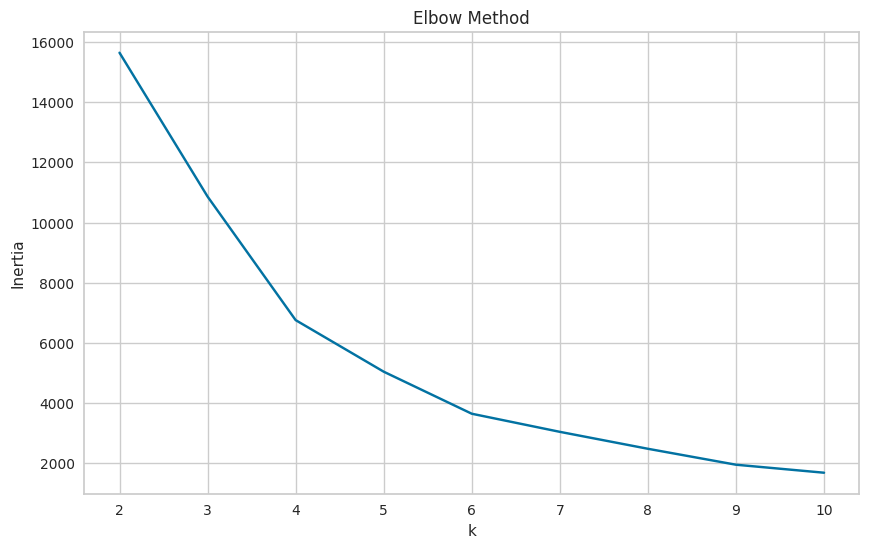

In [35]:
# Elbow Method
inertias = []
K = range(2, 11)

plt.figure(figsize=(10, 6))
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

For n_clusters = 2 The average silhouette_coefficient is : 0.6642339472840196
For n_clusters = 3 The average silhouette_coefficient is : 0.4924251463761386
For n_clusters = 4 The average silhouette_coefficient is : 0.4080458771730172
For n_clusters = 5 The average silhouette_coefficient is : 0.3600137593699095
For n_clusters = 6 The average silhouette_coefficient is : 0.39556896137130787


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

For n_clusters = 7 The average silhouette_coefficient is : 0.4061227339985969


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

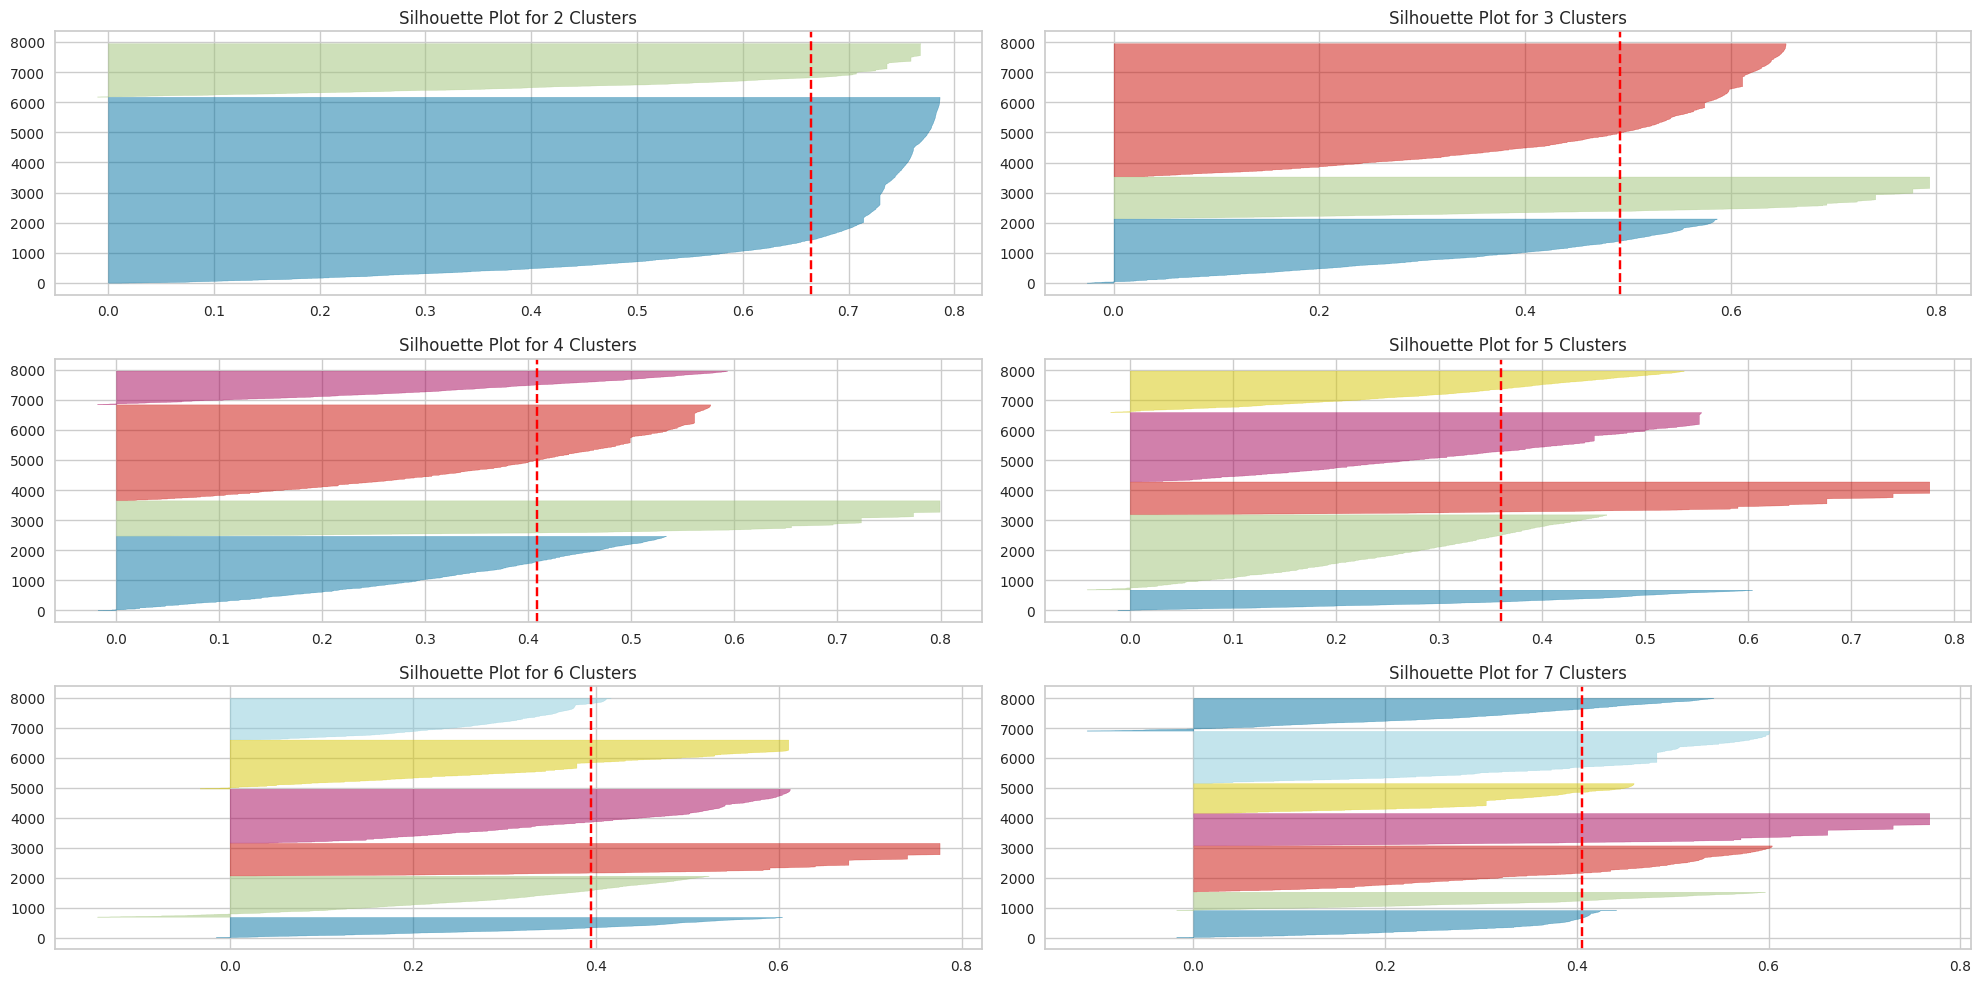

In [36]:
# Detailed Silhouette Analysis
num_of_cluster = [2, 3, 4, 5, 6, 7]
fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in num_of_cluster:
    clusterer = KMeans(n_clusters = k, n_init=10)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    visualizer.set_title(f'Silhouette Plot for {k} Clusters')

    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )
plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

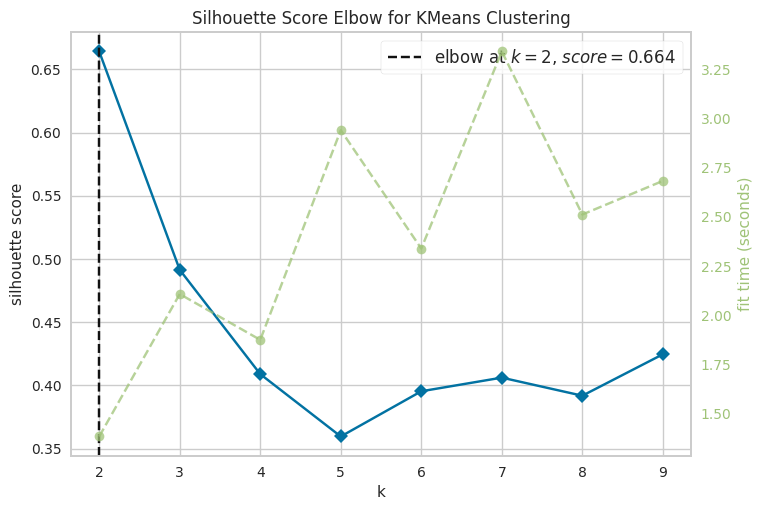

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [37]:
modeltes = KMeans(n_init = 10)
visualizer = KElbowVisualizer(modeltes, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

Berdasarkan nilai Silhoutte Score diatas, dapat dilihat bahwa k=2 merupakan nilai paling optimal. Oleh karena itu, saya memilih n_cluster = 2

In [38]:
# Choosing the number of clusters based on silhouette analysis
n_clusters = 2

# Fit KMeans model
cluster_model = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_pred = cluster_model.fit_predict(X_scaled)

In [39]:
cluster_pred = cluster_model.fit_predict(X_scaled)

# Add cluster labels to the data
data_with_clusters = pd.DataFrame(X_scaled, columns=features)
data_with_clusters['Cluster'] = cluster_pred

print("Cluster Assignments")
print(data_with_clusters['Cluster'].value_counts())

data_with_clusters

Cluster Assignments
Cluster
0    5102
1    2832
Name: count, dtype: int64


,extra,trip_distance,peak_hour,Cluster
0,1.772575,0.625749,1.342220,1
1,0.553574,2.131811,-0.745035,0
2,-0.665426,-0.512073,-0.745035,0
3,-0.665426,-0.648612,-0.745035,0
4,1.772575,2.131811,1.342220,1
...,...,...,...,...
7929,1.772575,-0.574136,1.342220,1
7930,2.382075,0.708499,-0.745035,0
7931,-0.665426,-0.834801,1.342220,1
7932,-0.665426,2.131811,-0.745035,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

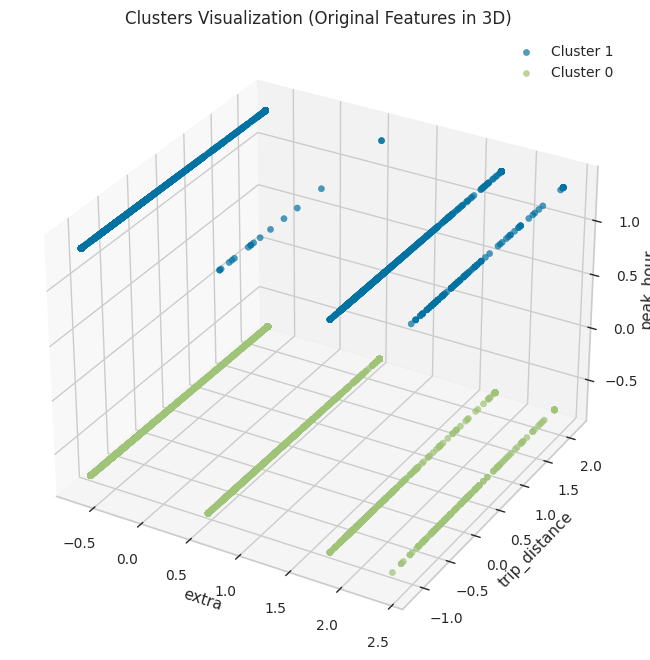

In [40]:
# Choose three features to plot
feature_x = 'extra'
feature_y = 'trip_distance'
feature_z = 'peak_hour'

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in data_with_clusters['Cluster'].unique():
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]
    ax.scatter(cluster_data[feature_x], cluster_data[feature_y], cluster_data[feature_z], label=f'Cluster {cluster_id}', alpha=0.7)

ax.set_title('Clusters Visualization (Original Features in 3D)')
ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)
ax.legend()
plt.show()

In [41]:
cluster_stats = data_with_clusters.groupby('Cluster').agg({
    'extra': ['mean', 'std'],
    'trip_distance': ['mean', 'std'],
    'peak_hour': ['mean', 'std'],
}).round(2)

cluster_stats

extra       trip_distance       peak_hour     
         mean   std          mean   std      mean  std
Cluster                                               
0       -0.12  0.84          0.02  1.02     -0.75  0.0
1        0.22  1.20         -0.03  0.95      1.34  0.0

### Hierarchial Clustering with Complete Linkage

In [42]:
# Import Library
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [43]:
complete_hierarchial = hierarchy.linkage(X_scaled, method='complete', metric='euclidean')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

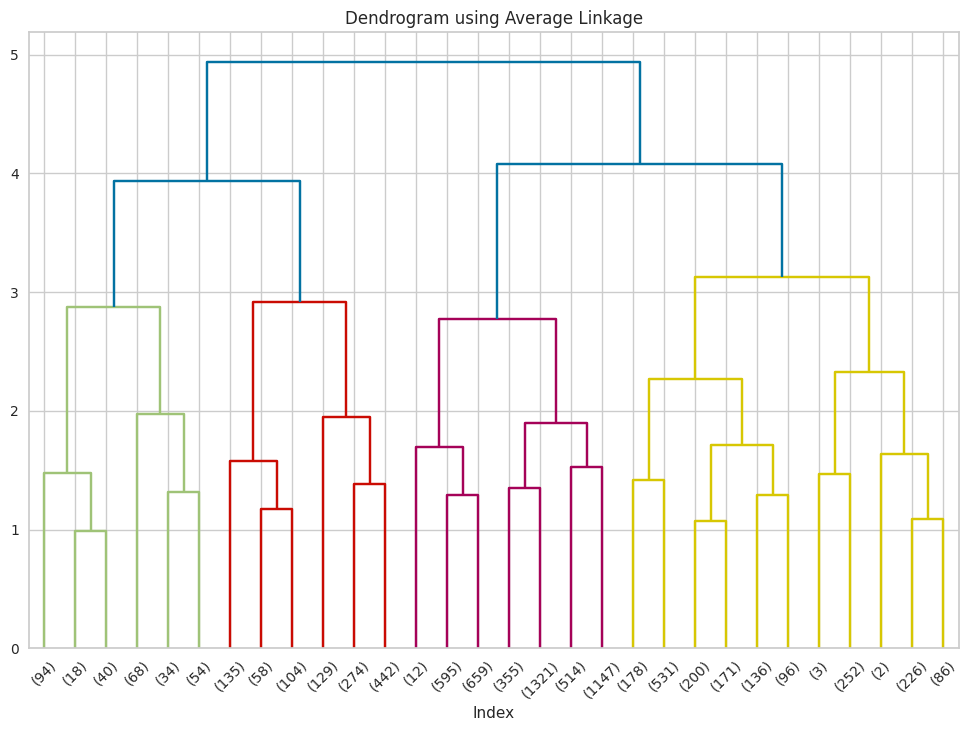

In [44]:
plt.figure(figsize=(12, 8))
hierarchy.dendrogram(complete_hierarchial, truncate_mode='lastp')
plt.title('Dendrogram using Average Linkage')
plt.xlabel('Index')
# plt.ylabel('Distance')
# plt.tight_layout()
plt.show()

Dari dendogram diatas, dapat dilihat bahwa pada `height` = 3 menghasilkan pengelompokkan yang jelas. Keempat cluster tersebut ditunjukkan dengan warna yang berbeda, yaitu hijau, merah, ungu, dan kuning. Pemilihan 3 cluster ini optimal karena menunjukkan pemisahan yang signifikan antar kelompok, yang terlihat dari jarak vertikal yang cukup besar pada struktur dendrogramnya, serta masing-masing cluster memiliki jumlah anggota yang proporsional.

In [45]:
n_clusters = 3
complete_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
labels = complete_model.fit_predict(X_scaled)

In [46]:
df_clustering['Cluster'] = labels

In [47]:
cluster_stats = df_clustering.groupby('Cluster').agg({
    'extra': ['mean', 'std'],
    'trip_distance': ['mean', 'std'],
    'peak_hour': ['mean', 'std'],
}).round(2)

cluster_stats

extra       trip_distance       peak_hour      
         mean   std          mean   std      mean   std
Cluster                                                
0        1.05  0.10          2.79  2.19      0.69  0.46
1        0.11  0.21          6.15  1.72      0.30  0.46
2        0.10  0.20          1.41  0.91      0.28  0.45

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

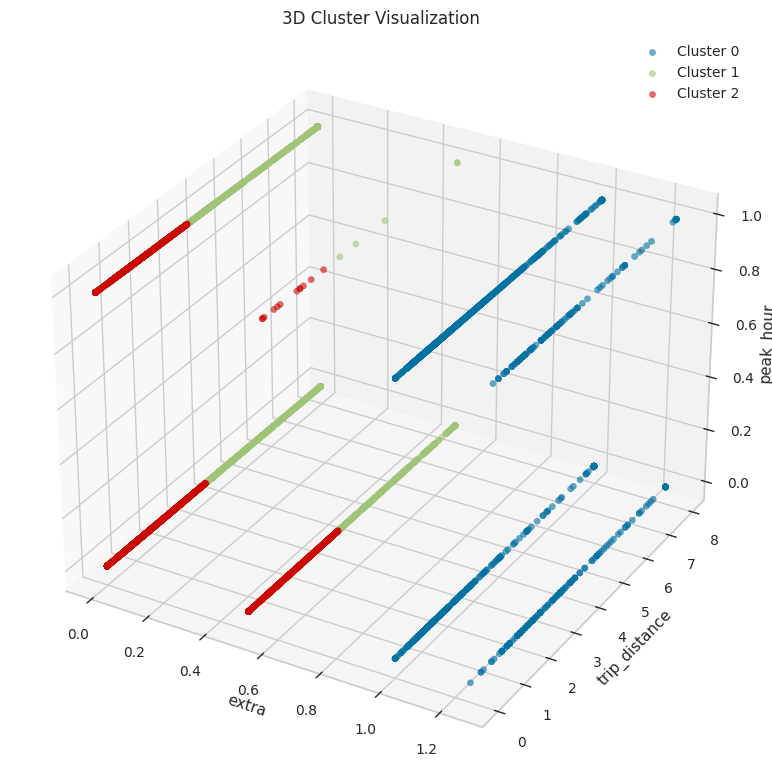

Cluster Characteristics:
        extra       trip_distance       peak_hour      
         mean   std          mean   std      mean   std
Cluster                                                
0        1.05  0.10          2.79  2.19      0.69  0.46
1        0.11  0.21          6.15  1.72      0.30  0.46
2        0.10  0.20          1.41  0.91      0.28  0.45


In [48]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Features to visualize
x_feature = 'extra'
y_feature = 'trip_distance'
z_feature = 'peak_hour'

# Plot each cluster
for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    ax.scatter(
        cluster_data[x_feature],
        cluster_data[y_feature],
        cluster_data[z_feature],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )

# Set plot labels and title
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.tight_layout()
plt.show()

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_stats)

### Hierarchial Clustering with Average Linkage

In [49]:
average_hierarchial = hierarchy.linkage(X_scaled, method='average', metric='euclidean')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

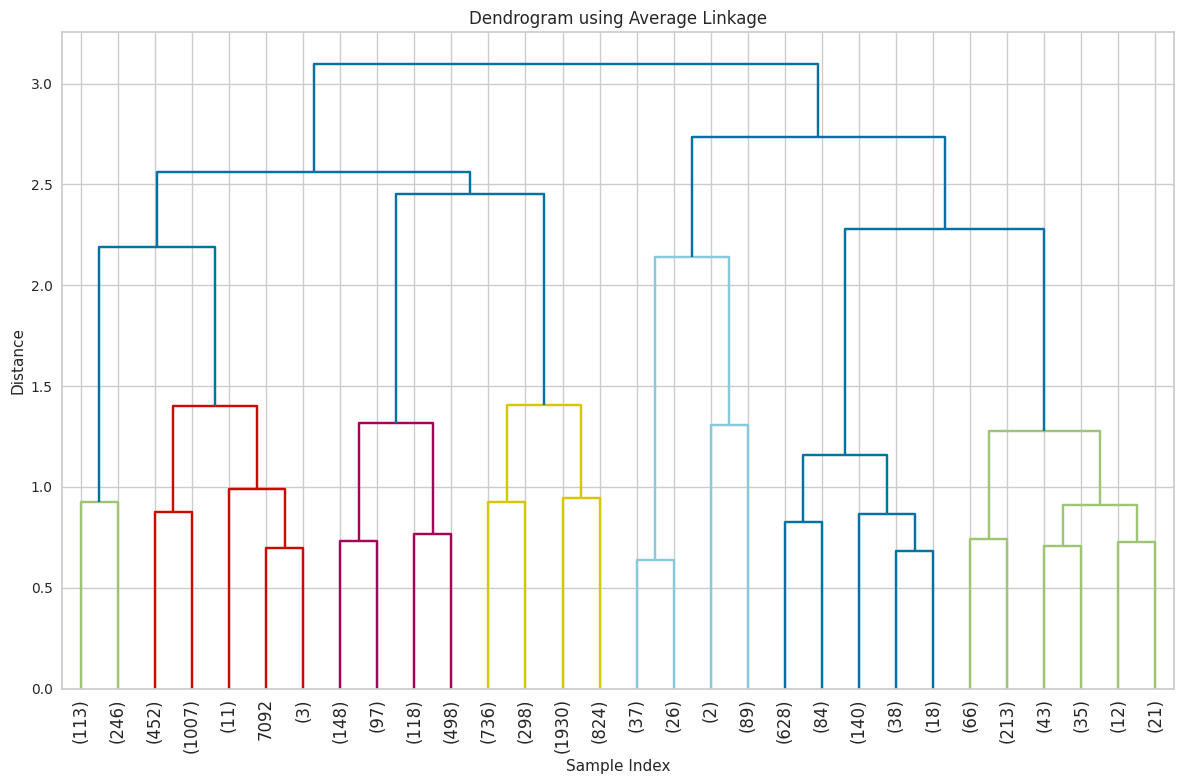

In [50]:
plt.figure(figsize=(12, 8))
hierarchy.dendrogram(average_hierarchial, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram using Average Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

Berdasarkan dendogram diatas, dapat dilihat jumlah cluster optimal adalah 3 karena pada height = 3, dataset telah terbagi memjadi cluster-cluster secara sempurna

In [51]:
n_clusters = 3 # Adjust based on dendrogram
average_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels = average_model.fit_predict(X_scaled)

In [52]:
df_clustering['Cluster'] = labels

In [53]:
cluster_stats = df_clustering.groupby('Cluster').agg({
    'extra': ['mean', 'std'],
    'trip_distance': ['mean', 'std'],
    'peak_hour': ['mean', 'std'],
}).round(2)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

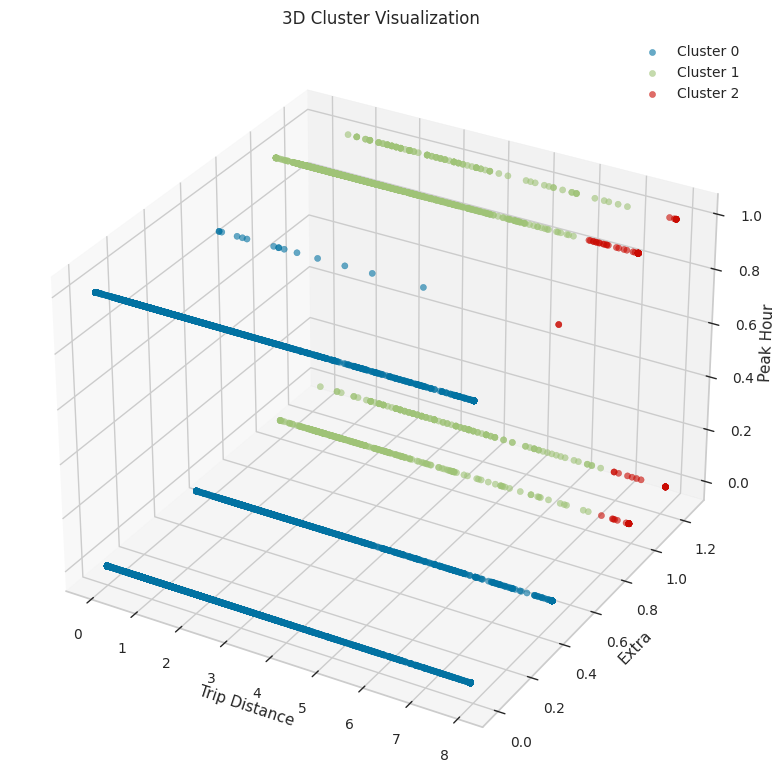

Cluster Characteristics:
        extra       trip_distance       peak_hour      
         mean   std          mean   std      mean   std
Cluster                                                
0        0.10  0.20          2.78  2.46      0.28  0.45
1        1.04  0.10          2.21  1.44      0.70  0.46
2        1.06  0.13          7.81  0.30      0.59  0.49


In [54]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Features to visualize
x_feature = 'trip_distance'
y_feature = 'extra'
z_feature = 'peak_hour'

# Plot each cluster
for cluster_id in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    ax.scatter(
        cluster_data[x_feature],
        cluster_data[y_feature],
        cluster_data[z_feature],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )

# Set plot labels and title
ax.set_xlabel('Trip Distance')
ax.set_ylabel('Extra')
ax.set_zlabel('Peak Hour')
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.tight_layout()
plt.show()

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_stats)

## Clustering Model Evaluation

### KMeans Clustering

Dengan menggunakan KMeans Clustering, kami mendapatkan 2 cluster berbeda dengan karakteristik sebagai berikut:
- Cluster 0 (Hijau):
Kelompok ini memiliki nilai rata-rata negatif untuk peak_hour (-0.75) dan extratrip_distance (-0.12). Ini menunjukkan pola perjalanan dengan intensitas rendah di jam sibuk dan jarak tambahan yang lebih pendek. Cluster ini mencerminkan pengguna yang cenderung melakukan perjalanan di luar jam sibuk dan dengan rute yang lebih efisien.
- Cluster 1 (Biru):
Kelompok ini memiliki nilai rata-rata positif untuk peak_hour (1.34) dan extratrip_distance (0.22). Karakteristik ini menunjukkan pola perjalanan dengan intensitas tinggi di jam sibuk dan jarak tambahan yang lebih jauh. Cluster ini merepresentasikan pengguna yang aktivitas perjalanannya terkonsentrasi di jam-jam sibuk dengan rute yang lebih panjang.

### Hierarchial Modeling with Complete Linkage

Berdasarkan gambar disamping, dapat dilihat bahwa data terbagi menjadi 3 cluster berdasarkan fitur dengan karakteristik sebagai berikut:

- Cluster 0 (Biru): Cluster ini merepresentasikan trip dengan biaya tambahan (extra) yang relatif tinggi, jarak perjalanan menengah, dan lebih sering dilakukan pada jam sibuk.

- Cluster 1 (Hijau): Cluster ini menunjukkan trip dengan jarak terpanjang namun biaya tambahan minimal dan jarang terjadi di jam sibuk.

- Cluster 2 (Merah): Cluster ini menggambarkan trip jarak pendek dengan biaya tambahan relatif kecil, dan umumnya dilakukan di luar jam sibuk.

### Hierarchial Modeling with Average Linkage

Berdasarkan gambar disamping, dapat dilihat bahwa data terbagi menjadi 3 cluster dengan karakteristik sebagai berikut:

- Cluster Biru (Cluster 0): Secara umum, kelompok ini menunjukkan perjalanan dengan biaya tambahan (extra) yang sangat kecil, jarak perjalanan yang tidak terlalu jauh, dan lebih jarang terjadi pada jam sibuk.

- Cluster Hijau (Cluster 1): Kelompok ini memiliki biaya tambahan yang cukup besar walaupun jarak tempuhnya lebih pendek. Namun, perjalanan di cluster ini lebih sering dilakukan pada jam sibuk.

- Cluster Merah (Cluster 2): Cluster ini merepresentasikan perjalanan dengan biaya tambahan yang tinggi, jarak yang jauh, namun tidak selalu dilakukan pada jam sibuk (walau nilainya cukup tinggi juga).

Dengan menggunakan Hierarchial Clustering dengan Average Linkage, kami mendapatkan 3 cluster:


### Evaluation Using Silhoutte Score

In [55]:
# Evaluasi Silhoutte Score dari ketiga model

from sklearn.metrics import silhouette_score

# Data preparation
X_scaled = scaler.fit_transform(X)

# KMeans with n_clusters=2
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# Hierarchical with Complete Linkage, n_clusters=3
complete_model = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_labels = complete_model.fit_predict(X_scaled)
complete_silhouette = silhouette_score(X_scaled, complete_labels)

# Hierarchical with Average Linkage, n_clusters=3
average_model = AgglomerativeClustering(n_clusters=3, linkage='average')
average_labels = average_model.fit_predict(X_scaled)
average_silhouette = silhouette_score(X_scaled, average_labels)

# Create results dataframe
silhouette_results = pd.DataFrame({
    'Model': ['KMeans (k=2)', 'Hierarchical Complete (k=3)', 'Hierarchical Average (k=3)'],
    'Silhouette Score': [kmeans_silhouette, complete_silhouette, average_silhouette]
})

print("Silhouette Score Comparison:")
print(silhouette_results)

Silhouette Score Comparison:
                         Model  Silhouette Score
0                 KMeans (k=2)          0.421753
1  Hierarchical Complete (k=3)          0.411248
2   Hierarchical Average (k=3)          0.373756


Berdasarkan ketiga model diatas, dapat dilihat bahwa nilai Silhoutte Score tertinggi berada pada model KMeans Clustering dengan `n_clusters=2`. Oleh karena itu, kami memutuskan untuk membuat 2 cluster berbeda

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

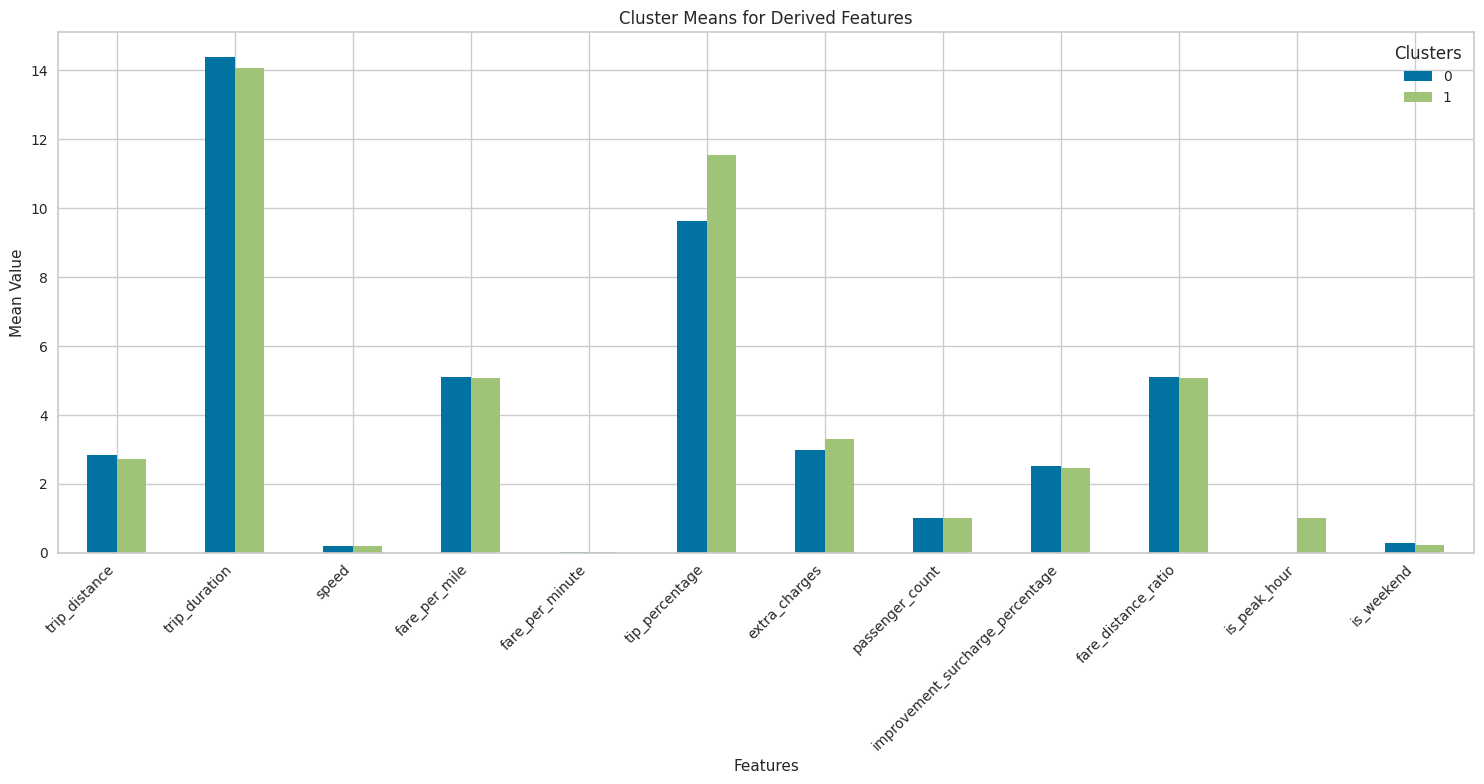


Detailed Cluster Characteristics:

Cluster 0:
trip_distance: 2.83
trip_duration: 14.38
speed: 0.20
fare_per_mile: 5.09
fare_per_minute: 0.02
tip_percentage: 9.64
extra_charges: 2.98
passenger_count: 1.00
improvement_surcharge_percentage: 2.52
fare_distance_ratio: 5.09
is_peak_hour: 0.00
is_weekend: 0.28

Cluster 1:
trip_distance: 2.72
trip_duration: 14.06
speed: 0.20
fare_per_mile: 5.08
fare_per_minute: 0.02
tip_percentage: 11.54
extra_charges: 3.31
passenger_count: 1.00
improvement_surcharge_percentage: 2.46
fare_distance_ratio: 5.08
is_peak_hour: 1.00
is_weekend: 0.22


In [56]:
# For KMeans with k=2
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Add cluster labels back to dataframe
df_clustering['Cluster'] = kmeans_labels

# Define features to analyze
features = [
   'trip_distance', 'trip_duration', 'speed', 'fare_per_mile',
   'fare_per_minute', 'tip_percentage', 'extra_charges',
   'passenger_count', 'improvement_surcharge_percentage',
   'fare_distance_ratio', 'is_peak_hour', 'is_weekend'
]

# Calculate mean values for each cluster
cluster_means = df_clustering.groupby('Cluster')[features].mean()

# Plot
plt.figure(figsize=(15, 8))
cluster_means.T.plot(kind='bar', ax=plt.gca())
plt.title('Cluster Means for Derived Features')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.legend(title='Clusters')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Print detailed characteristics
print("\nDetailed Cluster Characteristics:")
for cluster in cluster_means.index:
   print(f"\nCluster {cluster}:")
   for feature in features:
       mean_val = cluster_means.loc[cluster, feature]
       print(f"{feature}: {mean_val:.2f}")

The Urban Hopper (Cluster 0): Mewakili pengguna rekreasional yang lebih sering menggunakan taksi di luar jam sibuk dan weekend (28% aktivitas). Dengan jarak tempuh rata-rata 2.83 mil dan tips moderat 9.64%, mereka cenderung menggunakan taksi untuk kegiatan santai seperti jalan-jalan, makan di luar, atau mengunjungi tempat hiburan. Biaya tambahan yang lebih rendah ($2.98) menunjukkan mereka pintar memilih waktu perjalanan untuk menghindari surge pricing.

Rush Hour Warrior (Cluster 1): Pengguna yang melakukan perjalanan khusus di jam sibuk (100% peak hour) dengan aktivitas weekend yang lebih rendah (22%). Meskipun jarak tempuh serupa (2.72 mil), mereka memberikan tips lebih tinggi (11.54%) dan menerima biaya tambahan lebih besar ($3.31). Menggambarkan profil pekerja profesional yang memprioritaskan keandalan layanan selama rush hour.

# Klasifikasi

Pada bagian ini, kami akan membangun model untuk memprediksi payment_type. Kolom payment_type pada dataset berisi informasi sebagai berikut:

- 1: Kartu Kredit
- 2: Cash

Oleh karena itu, kami akan melakukan klasifikasi menggunakan beberapa model. Berikut model yang akan kami gunakan:

- Random Forest
- Logistic Regression
- XGBoost
- CatBoost

## Clone Data

In [57]:
df_classification = raw_df.copy()

## Klasifikasi Data Processing

### Validasi Data `payment_type`

Berdasarkan deskripsi data `payment_type`, payment_type hanya bisa berupa `1` atau `2`. Namun data `payment_type` yang berada di `train_taxi.csv` memiliki nilai selain `1` dan `2`. Berikut bukti terdapat nilai selain `1` dan `2` di `train_taxi.csv`.

In [58]:
df_classification["payment_type"].unique()

array([1., 2., 3., 4.])

Berdasarkan output eskeskusi kode, ditemukan nilai selain 1 dan 2 pada kolom payment_type. Oleh karena itu, baris yang memiliki nilai payment_type selain 1 dan 2 akan kami hapus

In [59]:
df_classification = df_classification[df_classification['payment_type'].isin([1,2])]

### Drop Kolom ID

In [60]:
df_classification = df_classification.drop(columns=['ID'])

### Drop Kolom `lpep_pickup_datetime` and `lpep_dropoff_datetime`

Kedua kolom tersebut, yaitu `lpep_pickup_datetime` dan `lpep_dropoff_datetime`, memuat informasi waktu *pickup* dan waktu *dropoff* untuk setiap perjalanan taksi. Kami memutuskan untuk menghapus kedua kolom tersebut karena nilainya tidak bersifat numerik dan memiliki variasi nilai yang sangat banyak (disebabkan oleh format datetime). Mengingat banyaknya variasi nilai tersebut, proses encoding menjadi tidak praktis untuk diterapkan. Oleh karena itu, kami memutuskan untuk menghapus kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime`.

In [61]:
df_classification = df_classification.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime'], axis=1)

### Membuat Features `is_give_tip_using_credit_card`

Setelah membaca deskripsi dataset, kami menemukan satu kolom yang menarik yaitu kolom `tip_amount`. Berikut adalah deskripsi dari kolom tersebut:

tip_amount: Jumlah tip – Field ini otomatis terisi untuk tip kartu kredit. Tip tunai tidak termasuk.

Dengan deskripsi tersebut, kami mengambil suatu kesimpulan bahwa, jika kolom tip_amount lebih besar dari 0, maka kemungkinan besar payment_type adalah `Kredit Card`

Berikut adalah kode untuk membuat feature ini:

In [62]:
df_classification['is_give_tip_using_credit_card'] = np.where(df_classification['tip_amount'] > 0, 1, 0)

### Encoding `payment_type`

Seperti yang sudah dijelaskan sebelumnya, `payment_type` adalah kolom yang memiliki nilai `1` dan `2`. Untuk menjadikannya masalah binary dan bukan multiclass, kami akan encode `payment_type` menjadi `0` dan `1`. Kami menyesuikan encode `payment_type` berdasarkan value `is_give_tip_using_credit_card`

In [63]:
df_classification['payment_type'] = df_classification['payment_type'].replace({
    2: 0,
    1: 1
})

### Encoding `store_and_fwd_flag` - Label Encoder

Dikarenakan nilai kolom `store_and_fwd_flag` adalah `N` atau `Y`, kami harus melakukan encoding menjadi `0` atau `1`.

In [64]:
from sklearn.preprocessing import LabelEncoder # type: ignore

label_encoder = LabelEncoder()
df_classification["store_and_fwd_flag"] = label_encoder.fit_transform(df_classification["store_and_fwd_flag"])

### Mengubah Tipe Data Kolom Kategorikal

Pada dataset, terdapat kolom kategorikal yang masih menggunakan float. Oleh karena itu, untuk kompatibilitas dengan model kami akan konversi ke int.

In [65]:
df_classification['trip_type'] = df_classification['trip_type'].astype('int')
df_classification["RatecodeID"] = df_classification["RatecodeID"].astype('int')
df_classification["passenger_count"]  = df_classification["passenger_count"].astype('int')
df_classification["VendorID"] = df_classification["VendorID"].astype('int')

### Data Overview

In [66]:
df_classification.apply(lambda x: x.unique())

VendorID                                                                    [2, 1]
store_and_fwd_flag                                                          [0, 1]
RatecodeID                                                         [1, 5, 2, 4, 3]
PULocationID                     [152, 93, 74, 226, 55, 75, 212, 82, 244, 41, 6...
DOLocationID                     [142, 107, 75, 129, 86, 263, 212, 226, 235, 74...
passenger_count                                              [1, 2, 3, 6, 5, 4, 0]
trip_distance                    [4.3, 13.52, 1.55, 1.22, 14.23, 1.2, 0.0, 2.34...
fare_amount                      [18.0, 38.0, 8.0, 45.5, 7.2, 25.0, 10.5, 7.0, ...
extra                                       [1.0, 0.5, 0.0, 3.75, 2.75, 3.25, 4.5]
mta_tax                                                                 [0.5, 0.0]
tip_amount                       [5.0, 12.15, 0.0, 1.0, 3.6, 2.51, 7.41, 6.11, ...
tolls_amount                     [0.0, 6.55, 2.45, 6.12, 3.0, 13.75, 9.0, 13.1,...
impr

In [67]:
df_classification.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,payment_type,is_give_tip_using_credit_card
0,2,0,1,152,142,1,4.30,18.0,1.0,0.5,5.00,0.00,0.3,27.55,1,2.75,1.0,1
1,2,0,1,93,107,2,13.52,38.0,0.5,0.5,12.15,6.55,0.3,60.75,1,2.75,1.0,1
2,2,0,1,74,75,1,1.55,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1,0.00,0.0,0
3,2,0,1,226,129,1,1.22,8.0,0.0,0.5,0.00,0.00,0.3,8.80,1,0.00,0.0,0
4,2,0,1,55,86,1,14.23,45.5,1.0,0.5,0.00,2.45,0.3,49.75,1,0.00,1.0,0


## Modeling

### Fungsi untuk metrics

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # type: ignore

def classification_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TP', 'TN', 'FP', 'FN'],
        'Value': [accuracy, precision, recall, f1, tp, tn, fp, fn]
    })
    return metrics_df

### Logistic Regression CV

In [69]:
X_lr = df_classification.drop(columns=['payment_type'], axis=1)
y_lr = df_classification['payment_type']

#### Scale X menggunakan RobustScaler

RobustScaler digunakan untuk menyamakan scale dari fitur yang ada di X. Hal tersebut dikarenakan pada dataset ini terdapat outlier.

In [70]:
from sklearn.preprocessing import RobustScaler # type: ignore

scaled_features = ['trip_distance', 'total_amount', 'fare_amount', 'tolls_amount', 'tip_amount', 'extra', 'mta_tax', 'congestion_surcharge']

scaler = RobustScaler()
scaler = scaler.fit(X_lr[scaled_features])
X_lr[scaled_features] = scaler.transform(X_lr[scaled_features])
X_lr

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge,is_give_tip_using_credit_card
0,2,0,1,152,142,1,0.855072,0.75,2.0,0.0,2.427184,0.00,0.3,1.187500,1,2.75,1
1,2,0,1,93,107,2,4.195652,2.75,1.0,0.0,5.898058,6.55,0.3,3.954167,1,2.75,1
2,2,0,1,74,75,1,-0.141304,-0.25,0.0,0.0,0.000000,0.00,0.3,-0.375000,1,0.00,0
3,2,0,1,226,129,1,-0.260870,-0.25,0.0,0.0,0.000000,0.00,0.3,-0.375000,1,0.00,0
4,2,0,1,55,86,1,4.452899,3.50,2.0,0.0,0.000000,2.45,0.3,3.037500,1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,0,1,75,74,1,-0.195652,-0.40,2.0,0.0,0.800971,0.00,0.3,-0.279167,1,0.00,1
7996,1,0,1,74,164,2,0.927536,0.60,5.5,0.0,0.000000,0.00,0.3,0.562500,1,2.75,0
7997,2,0,1,41,42,1,-0.423913,-0.55,0.0,0.0,0.000000,0.00,0.3,-0.625000,1,0.00,0
7998,2,0,1,244,233,1,2.336957,1.45,0.0,0.0,4.155340,0.00,0.3,1.984167,1,2.75,1


In [71]:
from sklearn.model_selection import train_test_split #type: ignore

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegressionCV #type: ignore

lr_model = LogisticRegressionCV(solver='liblinear',penalty='l1', cv=5, n_jobs=-1, random_state=42, max_iter=10000)

In [73]:
lr_model.fit(X_lr_train, y_lr_train)

LogisticRegressionCV(cv=5, max_iter=10000, n_jobs=-1, penalty='l1',
                     random_state=42, solver='liblinear')

In [74]:
y_lr_pred = lr_model.predict(X_lr_test)

In [75]:
lr_res = classification_metrics(y_lr_test, y_lr_pred)
lr_res

,Metric,Value
0,Accuracy,0.914304
1,Precision,0.972466
2,Recall,0.872054
3,F1-Score,0.919527
4,TP,777.000000
5,TN,674.000000
6,FP,22.000000
7,FN,114.000000


### Random Forest With Hyperparameter Tuning

In [76]:
X_rf = df_classification.drop(columns=['payment_type'], axis=1)
y_rf = df_classification['payment_type']

In [77]:
from sklearn.model_selection import train_test_split #type: ignore
from sklearn.ensemble import RandomForestClassifier #type: ignore
from sklearn.model_selection import GridSearchCV #type: ignore

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [78]:
param_grid = {
    'n_estimators': [200],  # reduced from [500, 1000]
    'max_depth': [15],      # reduced from [15, 20]
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']  # reduced from ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1, random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1, scoring='f1')

In [79]:
# grid_search.fit(X_rf_train, y_rf_train)

In [80]:
# best_params = grid_search.best_params_
# print(best_params)

# best_model = grid_search.best_estimator_
# print(best_model)

In [81]:
rf_params = {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, **rf_params)
rf_model.fit(X_rf_train, y_rf_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [82]:
y_rf_pred = rf_model.predict(X_rf_test)

In [83]:
rf_result = classification_metrics(y_rf_test, y_rf_pred)
rf_result

,Metric,Value
0,Accuracy,0.928796
1,Precision,0.977887
2,Recall,0.893378
3,F1-Score,0.933724
4,TP,796.000000
5,TN,678.000000
6,FP,18.000000
7,FN,95.000000


### XGBoost With Hyperparameter Tuning

In [84]:
import xgboost as xgb # type: ignore
from sklearn.model_selection import train_test_split, RandomizedSearchCV #type: ignore

In [85]:
X_xgbc = df_classification.drop(columns=['payment_type'], axis=1)
y_xgbc = df_classification['payment_type']

In [86]:
X_xgbc_train, X_xgbc_test, y_xgbc_train, y_xgbc_test = train_test_split(X_xgbc, y_xgbc, test_size=0.2, random_state=42)

In [87]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'n_estimators': [100, 200, 300, 500, 1000, 1500, 2000],
    'max_depth': [3, 5, 7, 9, 11, 13, 15],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_lambda': [0.1, 0.5, 1.0, 2.0, 3.0, 5.0],
}

model = xgb.XGBClassifier(objective='binary:logistic')
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                n_iter=100, scoring='f1_macro',
                                cv=5, verbose=1, n_jobs=-1, random_state=42)

In [88]:
# random_search.fit(X_xgbc_train, y_xgbc_train)

In [89]:
# best_params = random_search.best_params_
# print(best_params)

# best_model = random_search.best_estimator_
# print(best_model)# 

In [90]:
xgbc_params = {'subsample': 1.0, 'reg_lambda': 2.0, 'reg_alpha': 0.2, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7} 
xgbc_model =  xgb.XGBClassifier(objective='binary:logistic', **xgbc_params)
xgbc_model.fit(X_xgbc_train, y_xgbc_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
y_xgbc_pred = xgbc_model.predict(X_xgbc_test)

In [92]:
xgbc_result = classification_metrics(y_xgbc_test, y_xgbc_pred)
xgbc_result

,Metric,Value
0,Accuracy,0.928796
1,Precision,0.979064
2,Recall,0.892256
3,F1-Score,0.933647
4,TP,795.000000
5,TN,679.000000
6,FP,17.000000
7,FN,96.000000


### CatBoost With Hyperparamters Tuning

In [93]:
from catboost import CatBoostClassifier, Pool, cv, metrics #type: ignore
from sklearn.model_selection import train_test_split #type: ignore

numeric_features = [
    'trip_distance',
    'fare_amount',
    'extra',
    'tip_amount',
    'tolls_amount',
    'total_amount',
    'congestion_surcharge',
    'improvement_surcharge',
    'mta_tax'
]

categorical_features = df_classification.columns.difference(numeric_features)

X_ctbc = df_classification.drop(columns='payment_type')
y_ctbc = df_classification['payment_type']

In [94]:
X_ctbc_train, X_ctbc_test, y_ctbc_train, y_ctbc_test = train_test_split(X_ctbc, y_ctbc, test_size=0.2, random_state=42)

categorical_feature_indices = [X_ctbc_train.columns.get_loc(col) for col in categorical_features if col in X_ctbc_train.columns]

train_pool = Pool(
    data=X_ctbc_train,
    label=y_ctbc_train,
    cat_features=categorical_feature_indices
)

test_pool = Pool(
    data=X_ctbc_test,
    label=y_ctbc_test,
    cat_features=categorical_feature_indices
)

In [95]:
import hyperopt # type: ignore

def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        learning_rate=params['learning_rate'],
        iterations=500,
        use_best_model=True,
        loss_function=metrics.Logloss(),
        random_seed=42,
        depth=10,
        boosting_type='Ordered',
        eval_metric=metrics.F1(),
    )
    
    cv_data = cv(
        Pool(X_ctbc, y_ctbc, cat_features=categorical_feature_indices),
        model.get_params(),
        logging_level="Silent",
    )
    best_accuracy = np.max(cv_data['test-F1-mean'])
    
    return 1 - best_accuracy # as hyperopt minimises

In [96]:
# from numpy.random import default_rng # type: ignore

# params_space = {
#     'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
#     'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
# }

# trials = hyperopt.Trials()

# best = hyperopt.fmin(
#     hyperopt_objective,
#     space=params_space,
#     algo=hyperopt.tpe.suggest,
#     max_evals=20,
#     trials=trials,
#     rstate=default_rng(123)
# )

# print(best)

In [97]:
best = {'l2_leaf_reg': 1.0, 'learning_rate': 0.03797010034311476}

ctbc_model = CatBoostClassifier(
    l2_leaf_reg=int(best['l2_leaf_reg']),
    learning_rate=best['learning_rate'],
    iterations=1000,
    use_best_model=True,
    loss_function=metrics.Logloss(),
    random_seed=42,
    depth=8,
    verbose=1,
    boosting_type='Ordered',
    eval_metric=metrics.F1(),
)

In [98]:
ctbc_model.fit(train_pool, eval_set=test_pool, verbose=True)

0:	learn: 0.8982883	test: 0.9001793	best: 0.9001793 (0)	total: 103ms	remaining: 1m 42s
1:	learn: 0.9218964	test: 0.9212963	best: 0.9212963 (1)	total: 152ms	remaining: 1m 15s
2:	learn: 0.9241360	test: 0.9222677	best: 0.9222677 (2)	total: 181ms	remaining: 1m
3:	learn: 0.9258749	test: 0.9252336	best: 0.9252336 (3)	total: 197ms	remaining: 49s
4:	learn: 0.9260894	test: 0.9240654	best: 0.9252336 (3)	total: 228ms	remaining: 45.5s
5:	learn: 0.9286407	test: 0.9267721	best: 0.9267721 (5)	total: 255ms	remaining: 42.3s
6:	learn: 0.9308002	test: 0.9290323	best: 0.9290323 (6)	total: 281ms	remaining: 39.8s
7:	learn: 0.9300583	test: 0.9273154	best: 0.9290323 (6)	total: 289ms	remaining: 35.8s
8:	learn: 0.9308909	test: 0.9279438	best: 0.9290323 (6)	total: 319ms	remaining: 35.2s
9:	learn: 0.9303228	test: 0.9279438	best: 0.9290323 (6)	total: 347ms	remaining: 34.4s
10:	learn: 0.9304324	test: 0.9285714	best: 0.9290323 (6)	total: 375ms	remaining: 33.7s
11:	learn: 0.9302648	test: 0.9279438	best: 0.9290323 (6)

In [99]:
y_ctbc_pred = ctbc_model.predict(test_pool)

In [100]:
ctbc_result = classification_metrics(y_ctbc_test, y_ctbc_pred)
print(ctbc_result)

      Metric       Value
0   Accuracy    0.932577
1  Precision    0.980392
2     Recall    0.897868
3   F1-Score    0.937317
4         TP  800.000000
5         TN  680.000000
6         FP   16.000000
7         FN   91.000000


## Classification Model Evaluation

### Logistic Regression

In [101]:
lr_res

,Metric,Value
0,Accuracy,0.914304
1,Precision,0.972466
2,Recall,0.872054
3,F1-Score,0.919527
4,TP,777.000000
5,TN,674.000000
6,FP,22.000000
7,FN,114.000000


Model Logistic Regression CV menunjukkan performa yang baik dalam memprediksi tipe pembayaran dengan akurasi 91.43%. Model ini memiliki precision tinggi (97.25%) yang menunjukkan kemampuan baik dalam memprediksi pembayaran kartu kredit secara tepat. Recall 87.21% dan F1-Score 91.95% juga menunjukkan keseimbangan yang baik antara precision dan recall. Dari confusion matrix, model berhasil mengidentifikasi 777 true positives dan 674 true negatives, dengan relatif sedikit false positives (22) dan false negatives (114). CopyRetry

### Random Forest With Hyperparameter Tuning

In [102]:
rf_result

,Metric,Value
0,Accuracy,0.928796
1,Precision,0.977887
2,Recall,0.893378
3,F1-Score,0.933724
4,TP,796.000000
5,TN,678.000000
6,FP,18.000000
7,FN,95.000000


Model Random Forest dengan hyperparameter tuning menunjukkan peningkatan performa dibanding Logistic Regression, dengan akurasi 92.88%. Model ini mempertahankan precision tinggi (97.79%) dan meningkatkan recall menjadi 89.34%, menghasilkan F1-Score yang lebih baik (93.37%). Confusion matrix menunjukkan peningkatan true positives (796) dan pengurangan false negatives (95), dengan false positives yang lebih sedikit (18).

### XGBoost with hypertuning

In [103]:
xgbc_result

,Metric,Value
0,Accuracy,0.928796
1,Precision,0.979064
2,Recall,0.892256
3,F1-Score,0.933647
4,TP,795.000000
5,TN,679.000000
6,FP,17.000000
7,FN,96.000000


Model XGBoost dengan hyperparameter tuning menunjukkan performa yang sangat mirip dengan Random Forest, dengan akurasi 92.88%. Model memiliki precision 97.91%, recall 89.23%, dan F1-Score 93.36%. Confusion matrix menunjukkan 795 true positives, 679 true negatives, 17 false positives, dan 96 false negatives, hampir identik dengan hasil Random Forest.

### CatBoost With Hyperparameter Tuning

In [104]:
ctbc_result

,Metric,Value
0,Accuracy,0.932577
1,Precision,0.980392
2,Recall,0.897868
3,F1-Score,0.937317
4,TP,800.000000
5,TN,680.000000
6,FP,16.000000
7,FN,91.000000


Model CatBoost dengan hyperparameter tuning menunjukkan performa terbaik di antara semua model dengan akurasi 93.26%. Model ini mencapai precision tertinggi (98.09%), recall 89.79%, dan F1-Score terbaik (93.73%). Confusion matrix menunjukkan 800 true positives, 680 true negatives, hanya 16 false positives, dan 91 false negatives - menandakan peningkatan di semua metrik dibanding model-model sebelumnya.

## 🔥 Conclusion

| Model | Akurasi | Presisi | Recall | F1-Score |
|---|---|---|---|---|
| Logistic Regression CV | 0,9143 | 0,9725 | 0,8721 | 0,9195 |
| Random Forest dengan Hypertuning | 0,9288 | 0,9779 | 0,8934 | 0,9337 |
| XGBoost dengan Hypertuning | 0,9288 | 0,9791 | 0,8923 | 0,9336 |
| `CatBoost dengan Hypertuning` | `0`,`9326` | `0,9809` | `0,8979` | `0,9373` |


CatBoost dengan Hypertuning menunjukkan performa terbaik dibanding model lainnya, mencapai akurasi 0,9326 dan F1-Score 0,9373. Proses hyperparameter tuning berhasil mengoptimalkan model untuk menangkap pola dalam dataset dan memprediksi tipe pembayaran dengan lebih akurat.
Hasil ini juga menunjukkan bagaimana model berbasis pohon keputusan mampu mengungguli model yang lebih sederhana seperti Logistic Regression. Model-model ini juga menunjukkan ketahanan terhadap noise dan outlier yang umum ditemukan pada data finansial.
Menariknya, Logistic Regression tetap menunjukkan performa yang baik meski merupakan model paling sederhana. Namun, selisih performa dengan model-model berbasis pohon mengindikasikan adanya pola non-linear dalam data yang lebih baik ditangkap oleh model-model tersebut.

# Regresi

Pada bagian ini, kami akan melakukan prediksi untuk kolom `trip_distance`. Kolom `trip_distance` merupakan kolom yang bersifat numerik dan kontinu. Oleh karena itu, kami akan melakukan regresi untuk memprediksi kolom tersebut.

Berikut adalah model regresi yang akan kami gunakan untuk melakukan prediksi kolom `trip_distance`:

- XGBoost No Hypertuning
- XGBoost Hypertuning
- CatBoost No Hypertuning

## Regresi Data Processing

### Clone Data

In [105]:
df_regression = raw_df.copy()

### Drop Kolom ID

In [106]:
df_regression = df_regression.drop(columns=['ID'])

### Encoding `store_and_fwd_flag` - Label Encoder

Dikarenakan nilai kolom `store_and_fwd_flag` adalah `N` atau `Y`, kami harus melakukan encoding menjadi `0` atau `1`.

In [107]:
from sklearn.preprocessing import LabelEncoder # type: ignore

label_encoder = LabelEncoder()
df_regression["store_and_fwd_flag"] = label_encoder.fit_transform(df_regression["store_and_fwd_flag"])

### Encoding untuk kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` 


Kolom lpep_pickup_datetime dan lpep_dropoff_datetime berisi informasi waktu penjemputan dan pengantaran untuk setiap perjalanan taksi. Berdasarkan analisis yang kami lakukan, kedua kolom tersebut dapat dimanfaatkan untuk mengekstraksi data:

- Durasi perjalanan (trip duration)
- Jam penjemputan (pickup hour)
- Hari penjemputan (pickup day)
- Bulan penjemputan (pickup month)

Dari data-data tersebut, kami akan melakukan encoding ulang. Berikut adalah metode encoding yang akan kami gunakan:

- Jam penjemputan: cylinical encoding
- Bulan Penjemputan: cylindrical encoding
- Hari penjuemputan: One-hot encoding


#### Mendapatkan kolom pickup_day, dropoff_day, pickup_month, dropoff_month

In [108]:
df_regression['pickup_datetime'] = pd.to_datetime(df_regression['lpep_pickup_datetime']) 
df_regression['dropoff_datetime'] = pd.to_datetime(df_regression['lpep_dropoff_datetime'])

df_regression['pickup_hour'] = df_regression['pickup_datetime'].dt.hour
df_regression['pickup_day'] = df_regression['pickup_datetime'].dt.dayofweek
df_regression['pickup_month'] = df_regression['pickup_datetime'].dt.month
df_regression['dropoff_hour'] = df_regression['dropoff_datetime'].dt.hour
df_regression['dropoff_day'] = df_regression['dropoff_datetime'].dt.dayofweek
df_regression['dropoff_month'] = df_regression['dropoff_datetime'].dt.month

#### Mendapatkan trip_duration

In [109]:
df_regression['trip_duration'] = (df_regression['dropoff_datetime'] - df_regression['pickup_datetime']).dt.total_seconds() / 60

#### Cylinical Encoding

In [110]:
def encode_cyclical(feature, max_val):
    df_regression[f'{feature}_sin'] = np.sin(2 * np.pi * df_regression[feature] / max_val)
    df_regression[f'{feature}_cos'] = np.cos(2 * np.pi * df_regression[feature] / max_val)

encode_cyclical('pickup_hour', 24)
encode_cyclical('dropoff_hour', 24)
encode_cyclical('pickup_month', 12)
encode_cyclical('dropoff_month', 12)

#### Drop kolom waktu yang tidak diperlukan

Setelah encoding menjadi cyclical encoding, setiap kolom tersebut (jam, hari, dan bulan) akan menghasilkan dua kolom numerik baru yang merepresentasikan nilai sinus (sin) dan kosinus (cos) dari fitur waktu tersebut. Kedua kolom hasil transformasi (sin dan cos) inilah yang akan kita gunakan selanjutnya. Kolom waktu awal (lpep_pickup_datetime dan lpep_dropoff_datetime) beserta kolom hasil ekstraksi fitur (jam, hari, bulan) akan dihapus karena tidak lagi diperlukan.

In [111]:
df_regression = df_regression.drop(columns=['pickup_hour', 'pickup_month', 'dropoff_hour', 'dropoff_month', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'pickup_datetime', 'dropoff_datetime'], axis=1)

#### One Hot Encoding untuk `pickup_day` dan `dropoff_day`

In [112]:
pickup_day_one_hot = pd.get_dummies(df_regression['pickup_day'], prefix='pickup_day', drop_first=True).astype(int)
dropoff_day_one_hot = pd.get_dummies(df_regression['dropoff_day'], prefix='dropoff_day', drop_first=True).astype(int)
df_regression = pd.concat([df_regression, pickup_day_one_hot, dropoff_day_one_hot], axis=1) 

In [113]:
df_regression = df_regression.drop(columns=['pickup_day', 'dropoff_day'], axis=1)

### Mengubah Tipe Data Kolom Kategorikal

Pada dataset, terdapat kolom kategorikal yang masih menggunakan float. Oleh karena itu, untuk kompatibilitas dengan model kami akan konversi ke int.

In [114]:
df_regression['trip_type'] = df_regression['trip_type'].astype('int')
df_regression["RatecodeID"] = df_regression["RatecodeID"].astype('int')
df_regression["passenger_count"]  = df_regression["passenger_count"].astype('int')
df_regression["VendorID"] = df_regression["VendorID"].astype('int')
df_regression["payment_type"] = df_regression["payment_type"].astype('int')

### Data Overview

In [115]:
df_regression.apply(lambda x: x.unique())

VendorID                                                            [2, 1]
store_and_fwd_flag                                                  [0, 1]
RatecodeID                                                 [1, 5, 2, 4, 3]
PULocationID             [152, 93, 74, 226, 55, 75, 212, 82, 244, 41, 6...
DOLocationID             [142, 107, 75, 129, 86, 263, 212, 226, 235, 74...
passenger_count                                      [1, 2, 3, 6, 5, 0, 4]
trip_distance            [4.3, 13.52, 1.55, 1.22, 14.23, 1.2, 0.0, 2.34...
fare_amount              [18.0, 38.0, 8.0, 45.5, 7.2, 25.0, 10.5, 7.0, ...
extra                    [1.0, 0.5, 0.0, 3.75, 2.75, 3.25, 4.5, -0.5, -...
mta_tax                                                   [0.5, 0.0, -0.5]
tip_amount               [5.0, 12.15, 0.0, 1.0, 3.6, 2.51, 7.41, 6.11, ...
tolls_amount             [0.0, 6.55, 2.45, 6.12, 3.0, 13.75, 9.0, 13.1,...
improvement_surcharge                                     [0.3, 0.0, -0.3]
total_amount             

In [116]:
df_regression.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,pickup_day_3,pickup_day_4,pickup_day_5,pickup_day_6,dropoff_day_1,dropoff_day_2,dropoff_day_3,dropoff_day_4,dropoff_day_5,dropoff_day_6
0,2,0,1,152,142,1,4.30,18.0,1.0,0.5,...,0,1,0,0,0,0,0,1,0,0
1,2,0,1,93,107,2,13.52,38.0,0.5,0.5,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,74,75,1,1.55,8.0,0.0,0.5,...,0,0,0,0,0,1,0,0,0,0
3,2,0,1,226,129,1,1.22,8.0,0.0,0.5,...,0,0,0,0,1,0,0,0,0,0
4,2,0,1,55,86,1,14.23,45.5,1.0,0.5,...,1,0,0,0,0,0,1,0,0,0


## Modeling

### Fungsi untuk mendapatkan metrics dari model regresi

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #type: ignore

def get_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    metrics_df = pd.DataFrame({'mae': [mae], 'mse': [mse], 'rmse': [rmse], 'r2': [r2]})
    melted_df = pd.melt(metrics_df, var_name="Metrics name", value_name="Value")
    return melted_df

### XGBoost Non Hypertuning

In [118]:
## Import Dependencies
import xgboost as xgb # type: ignore
from sklearn.model_selection import train_test_split #type: ignore

In [119]:
X_xgb = df_regression.drop(columns='trip_distance', axis=1)
y_xgb = df_regression['trip_distance']

In [120]:
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

In [121]:
model_xgb = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        max_depth=9,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=3,
        reg_alpha=0.1,
        reg_lambda=1.0,
        random_state=42
    )

model_xgb.fit(X_xgb_train, y_xgb_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [122]:
y_xgb_pred = model_xgb.predict(X_xgb_test)

In [123]:
xgb_result = get_metrics(y_xgb_test, y_xgb_pred)
xgb_result

,Metrics name,Value
0,mae,0.614086
1,mse,1.400439
2,rmse,1.183401
3,r2,0.923097


### XGBoost Hypertuning

In [124]:
## Import Dependencies

import xgboost as xgb # type: ignore  # noqa: F811
from sklearn.model_selection import RandomizedSearchCV, train_test_split #type: ignore  # noqa: F811


In [125]:
X_xgbh = df_regression.drop(columns='trip_distance', axis=1)
y_xgbh = df_regression['trip_distance']

In [126]:
X_xgbh_train, X_xgbh_test, y_xgbh_train, y_xgbh_test = train_test_split(X_xgbh, y_xgbh, test_size=0.2, random_state=42)

Hypertuning paramater untuk XGBoost menggunakan RandomizedSearchCV, berikut adalah deskripsi paramater yang akan di hypertuning:

- learning_rate: Learning rate pada setiap iterasi. Nilai yang kecil membuat proses pembelajaran lebih lambat, tetapi berpotensi memberikan hasil yang lebih akurat.

- n_estimators: Jumlah tree yang dibuat (iterasi). Semakin banyak tree, model akan semakin kompleks, namun risiko overfitting juga meningkat.

- max_depth: Kedalaman maksimum tree. Membatasi kompleksitas, nilai yang terlalu tinggi dapat menyebabkan overfitting.

- subsample: Proporsi train data yang digunakan untuk membangun setiap tree. Mengurangi varians dan mempercepat proses pelatihan.

- colsample_bytree: Proporsi fitur yang digunakan untuk membangun setiap tree. Membantu mencegah korelasi antar tree yang dibuat.

- gamma: Penalti minimum untuk melakukan pemisahan (split) pada node. Mengontrol seberapa agresif tree di-prune.

- reg_alpha: Regularisasi L1 (LASSO). Digunakan untuk membantu dalam seleksi fitur.

- reg_lambda: Regularisasi L2 (Ridge). Digunakan untuk mencegah terjadinya overfitting.

In [127]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [0.1, 0.5, 1.0, 2.0, 3.0]
}

model = xgb.XGBRegressor(objective='reg:squarederror')
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=100, scoring='neg_root_mean_squared_error',
                                   cv=5, verbose=1, n_jobs=-1, random_state=42)

In [128]:
# random_search.fit(X_xgbh_train, y_xgbh_train)

In [129]:
# best_params = random_search.best_params_
# print(best_params)

# best_model = random_search.best_estimator_
# print(best_model)

In [130]:
# params dibawah adalah hasil dari random search
params = {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0.2, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}

best_model = xgb.XGBRegressor(**params)
best_model.fit(X_xgbh_train, y_xgbh_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [131]:
y_xgbh_pred = best_model.predict(X_xgbh_test)

In [132]:
xgbh_result = get_metrics(y_xgbh_test, y_xgbh_pred)
xgbh_result

,Metrics name,Value
0,mae,0.341535
1,mse,0.634050
2,rmse,0.796272
3,r2,0.965182


### CatBoost

In [133]:
### Import libraries
from catboost import CatBoostRegressor, Pool # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

In [134]:
df_regression_ctb = df_regression.copy()

numeric_features = [
    'trip_distance',
    'fare_amount',
    'extra',
    'tip_amount',
    'tolls_amount',
    'total_amount',
    'congestion_surcharge',
    'improvement_surcharge',
    'mta_tax',
    "trip_duration",
    "pickup_hour_sin",
    "pickup_hour_cos",
    "dropoff_hour_sin",
    "dropoff_hour_cos",
    "pickup_month_sin",
    "pickup_month_cos",
    "dropoff_month_sin",
    "dropoff_month_cos",
]

categorical_features = df_regression_ctb.columns.difference(numeric_features)
categorical_features

Index(['DOLocationID', 'PULocationID', 'RatecodeID', 'VendorID',
       'dropoff_day_1', 'dropoff_day_2', 'dropoff_day_3', 'dropoff_day_4',
       'dropoff_day_5', 'dropoff_day_6', 'passenger_count', 'payment_type',
       'pickup_day_1', 'pickup_day_2', 'pickup_day_3', 'pickup_day_4',
       'pickup_day_5', 'pickup_day_6', 'store_and_fwd_flag', 'trip_type'],
      dtype='object')

In [135]:
X_ctb = df_regression_ctb.drop(columns=['trip_distance'])
y_ctb = df_regression_ctb['trip_distance']

In [136]:
X_ctb_train, X_ctb_test, y_ctb_train, y_ctb_test = train_test_split(X_ctb, y_ctb, test_size=0.2, random_state=42)

In [137]:
categorical_feature_indices = [X_ctb_train.columns.get_loc(col) for col in categorical_features if col in X_ctb_train.columns]

train_pool = Pool(
    data=X_ctb_train,
    label=y_ctb_train,
    cat_features=categorical_feature_indices
)

test_pool = Pool(
    data=X_ctb_test,
    label=y_ctb_test,
    cat_features=categorical_feature_indices
)

ctb_model = CatBoostRegressor(
    loss_function='RMSE',
    verbose=0,
    od_wait=20,
    od_pval=0.01
)

In [138]:
ctb_model.fit(train_pool, eval_set=test_pool, verbose=True)

Learning rate set to 0.06815
0:	learn: 4.4247765	test: 4.0389717	best: 4.0389717 (0)	total: 12.3ms	remaining: 12.3s
1:	learn: 4.1879011	test: 3.8268780	best: 3.8268780 (1)	total: 22.6ms	remaining: 11.3s
2:	learn: 3.9812466	test: 3.6322620	best: 3.6322620 (2)	total: 30.3ms	remaining: 10.1s
3:	learn: 3.7887096	test: 3.4481864	best: 3.4481864 (3)	total: 39.1ms	remaining: 9.73s
4:	learn: 3.6131209	test: 3.2824254	best: 3.2824254 (4)	total: 47.9ms	remaining: 9.53s
5:	learn: 3.4471936	test: 3.1195621	best: 3.1195621 (5)	total: 56.4ms	remaining: 9.35s
6:	learn: 3.2849196	test: 2.9657775	best: 2.9657775 (6)	total: 64.5ms	remaining: 9.14s
7:	learn: 3.1360981	test: 2.8273248	best: 2.8273248 (7)	total: 77.1ms	remaining: 9.56s
8:	learn: 2.9923073	test: 2.6918489	best: 2.6918489 (8)	total: 86.5ms	remaining: 9.53s
9:	learn: 2.8575831	test: 2.5727199	best: 2.5727199 (9)	total: 95.7ms	remaining: 9.47s
10:	learn: 2.7386426	test: 2.4691743	best: 2.4691743 (10)	total: 104ms	remaining: 9.39s
11:	learn: 2.

In [139]:
y_ctb_pred = ctb_model.predict(X_ctb_test)

In [140]:
ctb_result = get_metrics(y_ctb_test, y_ctb_pred)
ctb_result

,Metrics name,Value
0,mae,0.364812
1,mse,0.676420
2,rmse,0.822447
3,r2,0.962855


## Regression Model Evaluation

### XGBoost

In [141]:
xgb_result

,Metrics name,Value
0,mae,0.614086
1,mse,1.400439
2,rmse,1.183401
3,r2,0.923097


Model XGBoost tanpa hypertuning menunjukkan performa yang baik dengan R² 0,923 yang mengindikasikan model dapat menjelaskan 92,3% variasi dalam data. MAE sebesar 0,614 menunjukkan rata-rata deviasi prediksi sekitar 0,6 mil dari nilai sebenarnya. RMSE 1,183 mengindikasikan adanya beberapa prediksi dengan error yang lebih besar, namun secara keseluruhan model cukup akurat dalam memprediksi jarak perjalanan.

### XGBoost With Hyperparameter Tuning

In [142]:
xgbh_result

,Metrics name,Value
0,mae,0.341535
1,mse,0.634050
2,rmse,0.796272
3,r2,0.965182


Model XGBoost dengan hypertuning menunjukkan peningkatan signifikan di semua metrik. R² meningkat menjadi 0,965, menandakan model dapat menjelaskan 96,5% variasi data. MAE turun menjadi 0,342 mil dan RMSE menjadi 0,796, mengindikasikan akurasi prediksi yang lebih tinggi dibanding versi tanpa hypertuning.

### CatBoost

In [143]:
ctb_result

,Metrics name,Value
0,mae,0.364812
1,mse,0.676420
2,rmse,0.822447
3,r2,0.962855


Model CatBoost menunjukkan performa yang sebanding dengan XGBoost hypertuning dengan R² 0,963. Model ini mencapai MAE 0,365 mil dan RMSE 0,822, sedikit lebih tinggi dari XGBoost hypertuning namun tetap menunjukkan akurasi prediksi yang sangat baik untuk jarak perjalanan.

## 🔥 Conclusion


### Regression Models
| Model | R² | MAE |
|---|---|---|
| XGBoost | 0,923 | 0,614 |  
| `XGBoost dengan Hypertuning` | `0,965` | `0,342` |
| CatBoost dengan Hypertuning | 0,963 | 0,365 |

XGBoost dengan Hypertuning muncul sebagai model dengan performa terbaik, mencapai R-squared 0,965 dan MAE 0,342. Ini menunjukkan kemampuan yang kuat dalam menangkap hubungan dalam dataset dan membuat prediksi yang akurat.
Melalui performa model, kami menyimpulkan bahwa:

- Keberhasilan XGBoost menunjukkan kemampuannya dalam menangani hubungan non-linear dan interaksi kompleks dalam data
- Proses hyperparameter tuning memberikan peningkatan signifikan pada performa model, terlihat dari peningkatan R² dari 0,923 menjadi 0,965
- CatBoost menunjukkan performa yang sebanding dengan XGBoost, mengindikasikan kedua model sama-sama efektif untuk kasus ini